# Imports

In [1]:
import numpy as np
from numpy import mean
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import pickle

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [20, 10]

# Pre-COVID

In [17]:
df_time_features_pre_COVID = pickle.load(open(r"..\data\flu_cases\df_time_features_pre_COVID.pkl", "rb" ))

df_flu_pre_COVID = pickle.load(open(r"..\data\flu_cases\df_flu_pre_COVID_total.pkl", "rb" ))
df_flu = pickle.load(open(r"..\data\flu_cases\df_flu_total.pkl", "rb" ))

In [18]:
df_time_features_pre_COVID

,y1,y2,y3,y4,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,season_Spring,season_Summer,season_Winter
0,9.0,18.0,15.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
1,18.0,15.0,29.0,59.0,9.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2,15.0,29.0,59.0,50.0,18.0,9.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
3,29.0,59.0,50.0,37.0,15.0,18.0,9.0,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
4,59.0,50.0,37.0,26.0,29.0,15.0,18.0,9.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,4789.0,4654.0,3989.0,3656.0,4182.0,3549.0,3811.0,3845.0,3126.0,2206.0,...,0,0,0,0,0,0,0,0,0,1
231,4654.0,3989.0,3656.0,3576.0,4789.0,4182.0,3549.0,3811.0,3845.0,3126.0,...,0,0,0,0,0,0,0,0,0,1
232,3989.0,3656.0,3576.0,3404.0,4654.0,4789.0,4182.0,3549.0,3811.0,3845.0,...,0,0,0,0,0,0,0,0,0,1
233,3656.0,3576.0,3404.0,2991.0,3989.0,4654.0,4789.0,4182.0,3549.0,3811.0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
df_flu_pre_COVID = df_flu_pre_COVID.reset_index()

In [20]:
df_flu_pre_COVID

,Week Ending,Total Cases
0,2015-09-05,9.0
1,2015-09-12,18.0
2,2015-09-19,15.0
3,2015-09-26,29.0
4,2015-10-03,59.0
...,...,...
230,2020-02-01,4789.0
231,2020-02-08,4654.0
232,2020-02-15,3989.0
233,2020-02-22,3656.0


In [21]:
df = pd.concat([df_flu_pre_COVID, df_time_features_pre_COVID], axis = 1)

In [22]:
df = df.dropna()

In [23]:
df = df[['Week Ending','Total Cases']].reset_index(drop=True)

In [24]:
df

,Week Ending,Total Cases
0,2016-09-03,2.0
1,2016-09-10,18.0
2,2016-09-17,23.0
3,2016-09-24,44.0
4,2016-10-01,63.0
...,...,...
178,2020-02-01,4789.0
179,2020-02-08,4654.0
180,2020-02-15,3989.0
181,2020-02-22,3656.0


In [25]:
train_size = int(len(df) *.7)
test_size = len(df) - train_size
train_set, test_set = df[0:train_size], df[train_size:len(df)]

In [26]:
train_set

,Week Ending,Total Cases
0,2016-09-03,2.0
1,2016-09-10,18.0
2,2016-09-17,23.0
3,2016-09-24,44.0
4,2016-10-01,63.0
...,...,...
123,2019-01-12,3182.0
124,2019-01-19,2339.0
125,2019-01-26,2156.0
126,2019-02-02,2037.0


In [28]:
test_set = test_set.reset_index(drop=True)

In [30]:
pickle.dump(train_set, open(r"..\data\flu_cases\df_cases_pre_COVID_train.pkl", "wb" ))
pickle.dump(test_set, open(r"..\data\flu_cases\df_cases_pre_COVID_test.pkl", "wb" ))

In [33]:
train_size = int(len(df_flu) *.8)
test_size = len(df_flu) - train_size
train_set, test_set = df_flu[0:train_size], df_flu[train_size:len(df_flu)]

In [36]:
train_set = train_set.reset_index()
train_set

,Week Ending,Total Cases
0,2015-09-05,9.0
1,2015-09-12,18.0
2,2015-09-19,15.0
3,2015-09-26,29.0
4,2015-10-03,59.0
...,...,...
296,2021-05-08,0.0
297,2021-05-15,2.0
298,2021-05-22,1.0
299,2021-05-29,0.0


In [37]:
test_set = test_set.reset_index()
test_set

,Week Ending,Total Cases
0,2021-06-12,1.0
1,2021-06-19,0.0
2,2021-06-26,0.0
3,2021-07-03,0.0
4,2021-07-10,0.0
...,...,...
71,2022-10-22,438.0
72,2022-10-29,1031.0
73,2022-11-05,2407.0
74,2022-11-12,4144.0


In [38]:
pickle.dump(train_set, open(r"..\data\flu_cases\df_cases_train.pkl", "wb" ))
pickle.dump(test_set, open(r"..\data\flu_cases\df_cases_test.pkl", "wb" ))

# 2-Week Moving Average - Pre-COVID - 1 week ahead

In [56]:
df_train = pickle.load(open(r"..\data\flu_cases\df_cases_pre_COVID_train.pkl", "rb" ))
df_test = pickle.load(open(r"..\data\flu_cases\df_cases_pre_COVID_test.pkl", "rb" ))

In [57]:
df_train.head()

,Week Ending,Total Cases
0,2016-09-03,2.0
1,2016-09-10,18.0
2,2016-09-17,23.0
3,2016-09-24,44.0
4,2016-10-01,63.0


In [58]:
df_test.head()

,Week Ending,Total Cases
0,2019-02-16,1521.0
1,2019-02-23,1558.0
2,2019-03-02,1734.0
3,2019-03-09,1759.0
4,2019-03-16,1634.0


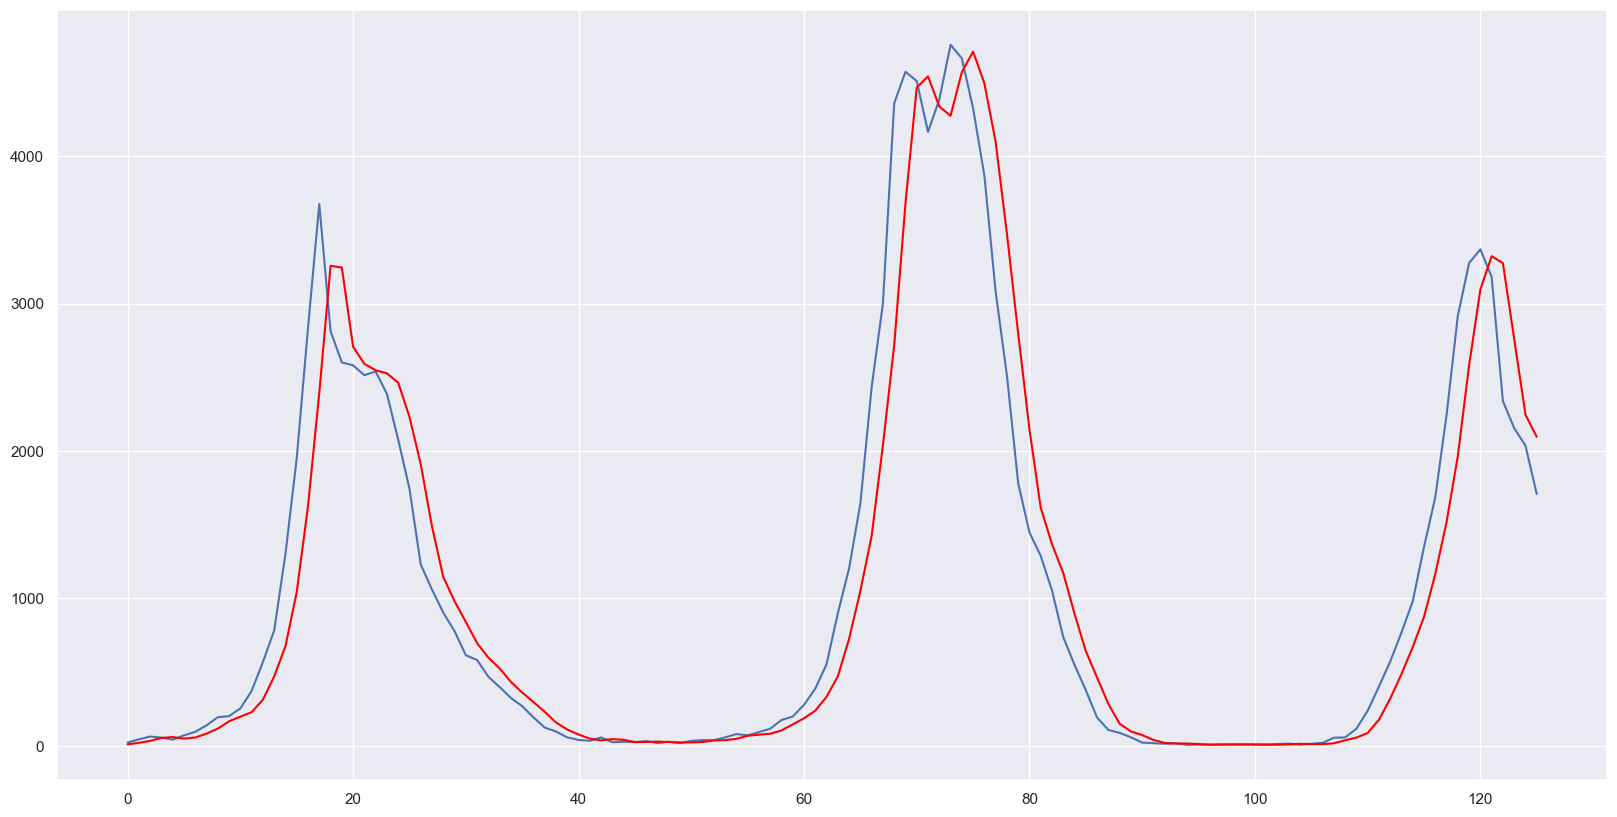

MSE_train: 175577.2599
RMSE_train: 419.0194
MAE_train: 256.504


In [59]:
X = df_train['Total Cases']
window = 2
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window, length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    # print(f'predicted={yhat}, actual={obs}')

# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

MSE_train = round(mean_squared_error(df_train['Total Cases'][2:], predictions),4)
RMSE_train = round(mean_squared_error(df_train['Total Cases'][2:], predictions, squared=False),4)
MAE_train = round(mean_absolute_error(df_train['Total Cases'][2:], predictions),4)
print(f'MSE_train: {MSE_train}')
print(f'RMSE_train: {RMSE_train}')
print(f'MAE_train: {MAE_train}')

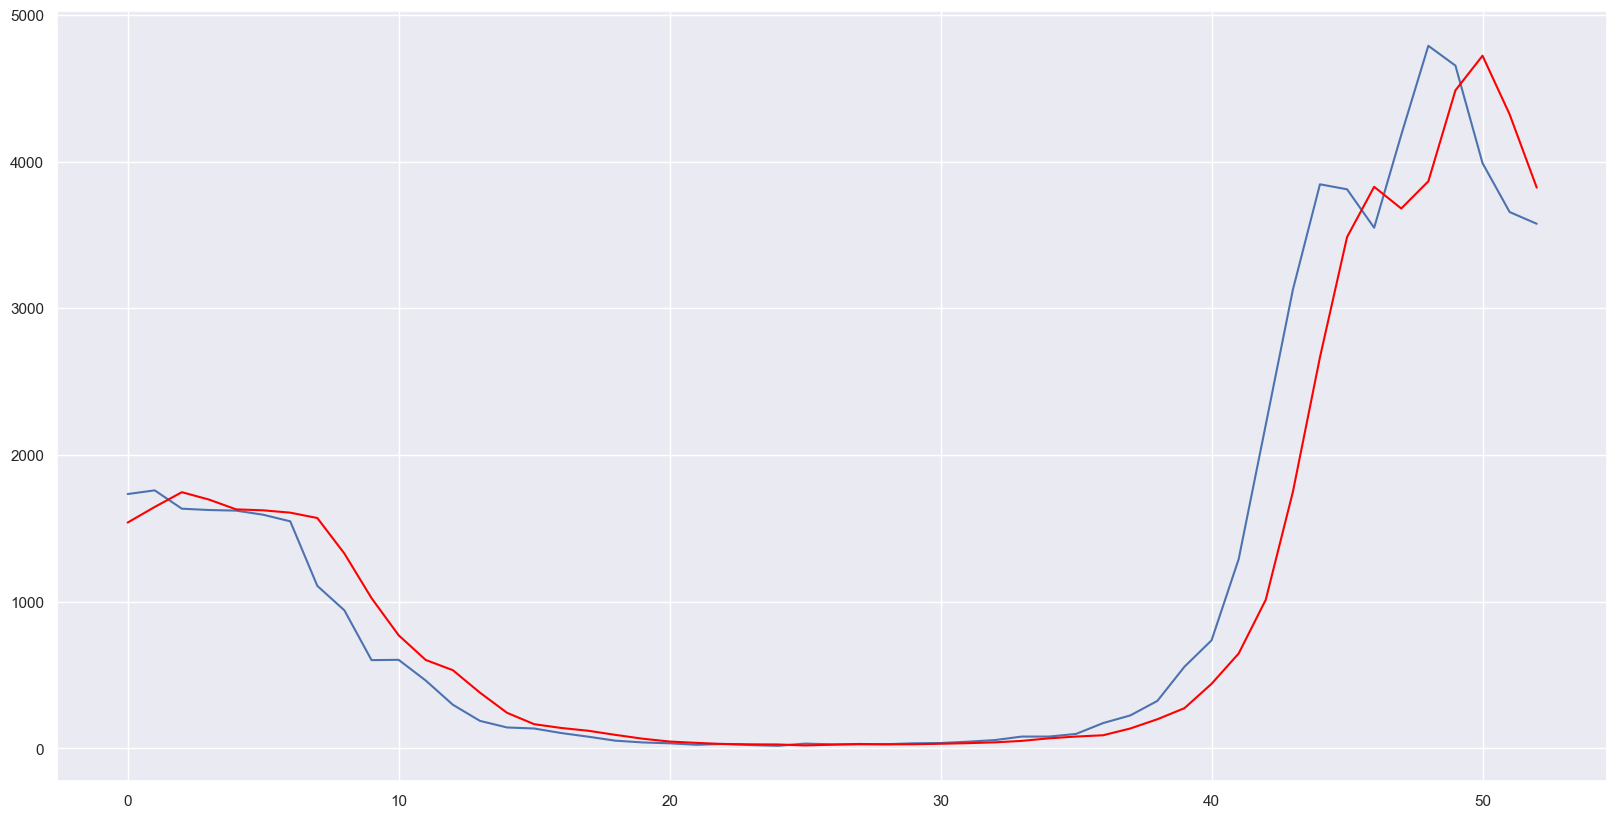

MSE_test: 159495.3632
RMSE_test: 399.3687
MAE_test: 228.9151


In [61]:
X = df_test['Total Cases']
window = 2
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window, length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    # print(f'predicted={yhat}, actual={obs}')

# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

MSE_test = round(mean_squared_error(df_test['Total Cases'][2:], predictions),4)
RMSE_test = round(mean_squared_error(df_test['Total Cases'][2:], predictions, squared=False),4)
MAE_test = round(mean_absolute_error(df_test['Total Cases'][2:], predictions),4)
print(f'MSE_test: {MSE_test}')
print(f'RMSE_test: {RMSE_test}')
print(f'MAE_test: {MAE_test}')

# Moving Average - Pre-COVID - 2 weeks ahead

In [62]:
df_train = df_train.set_index('Week Ending')
df_train = df_train.resample('2W').mean()

In [63]:
df_test = df_test.set_index('Week Ending')
df_test = df_test.resample('2W').mean()

In [64]:
df_train

,Total Cases
Week Ending,
2016-09-04,2.0
2016-09-18,20.5
2016-10-02,53.5
2016-10-16,49.0
2016-10-30,83.0
...,...
2018-12-23,2581.5
2019-01-06,3322.5
2019-01-20,2760.5


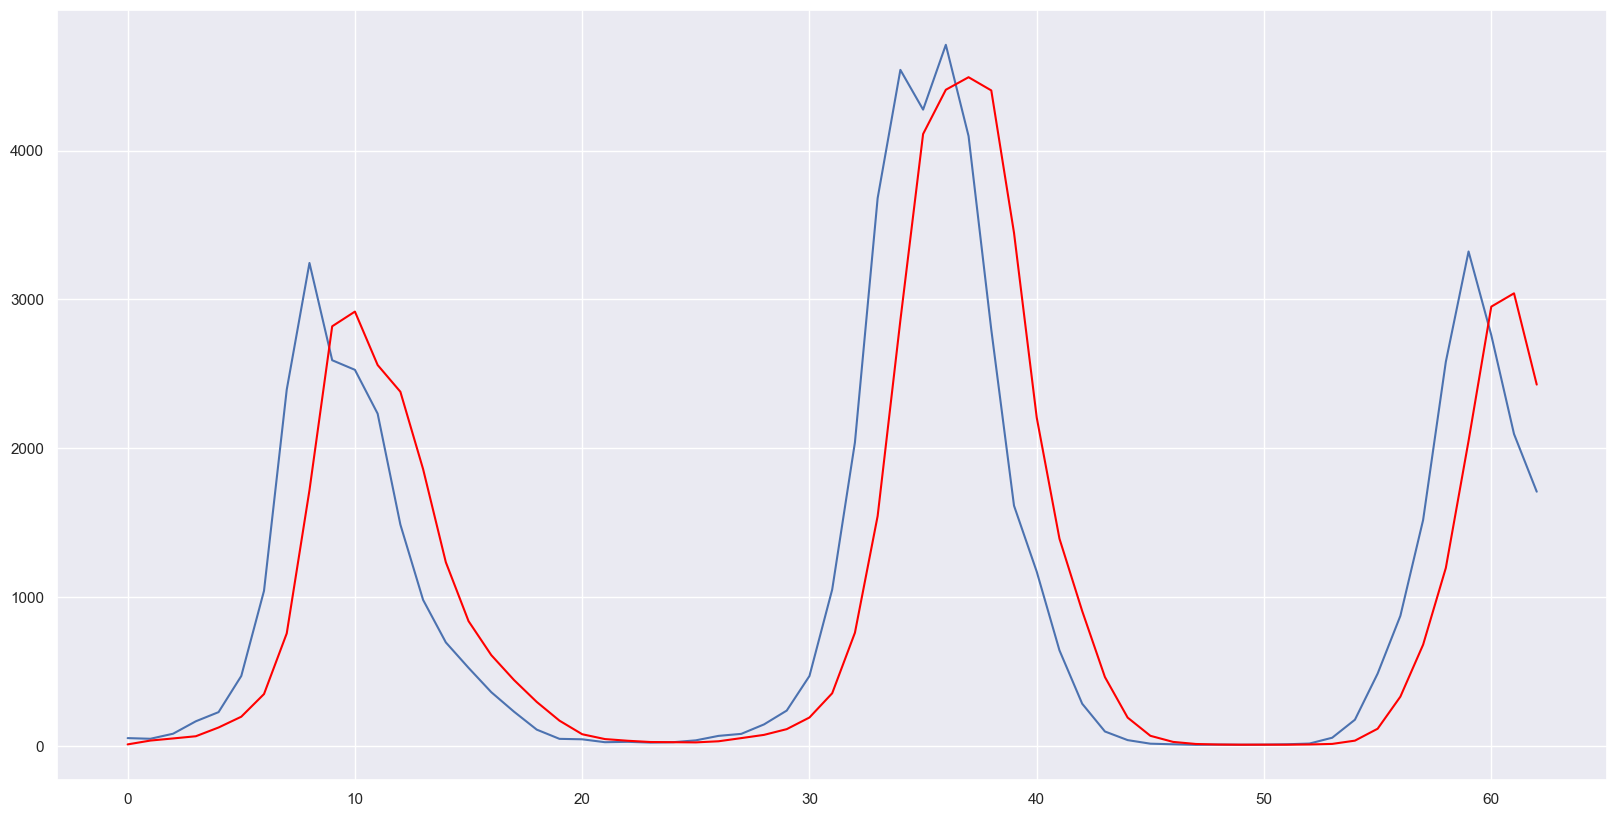

MSE_train: 510554.1319
RMSE_train: 714.5307
MAE_train: 459.1627


In [65]:
X = df_train['Total Cases']
window = 2
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window, length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    # print(f'predicted={yhat}, actual={obs}')

# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

MSE_train = round(mean_squared_error(df_train['Total Cases'][2:], predictions),4)
RMSE_train = round(mean_squared_error(df_train['Total Cases'][2:], predictions, squared=False),4)
MAE_train = round(mean_absolute_error(df_train['Total Cases'][2:], predictions),4)
print(f'MSE_train: {MSE_train}')
print(f'RMSE_train: {RMSE_train}')
print(f'MAE_train: {MAE_train}')

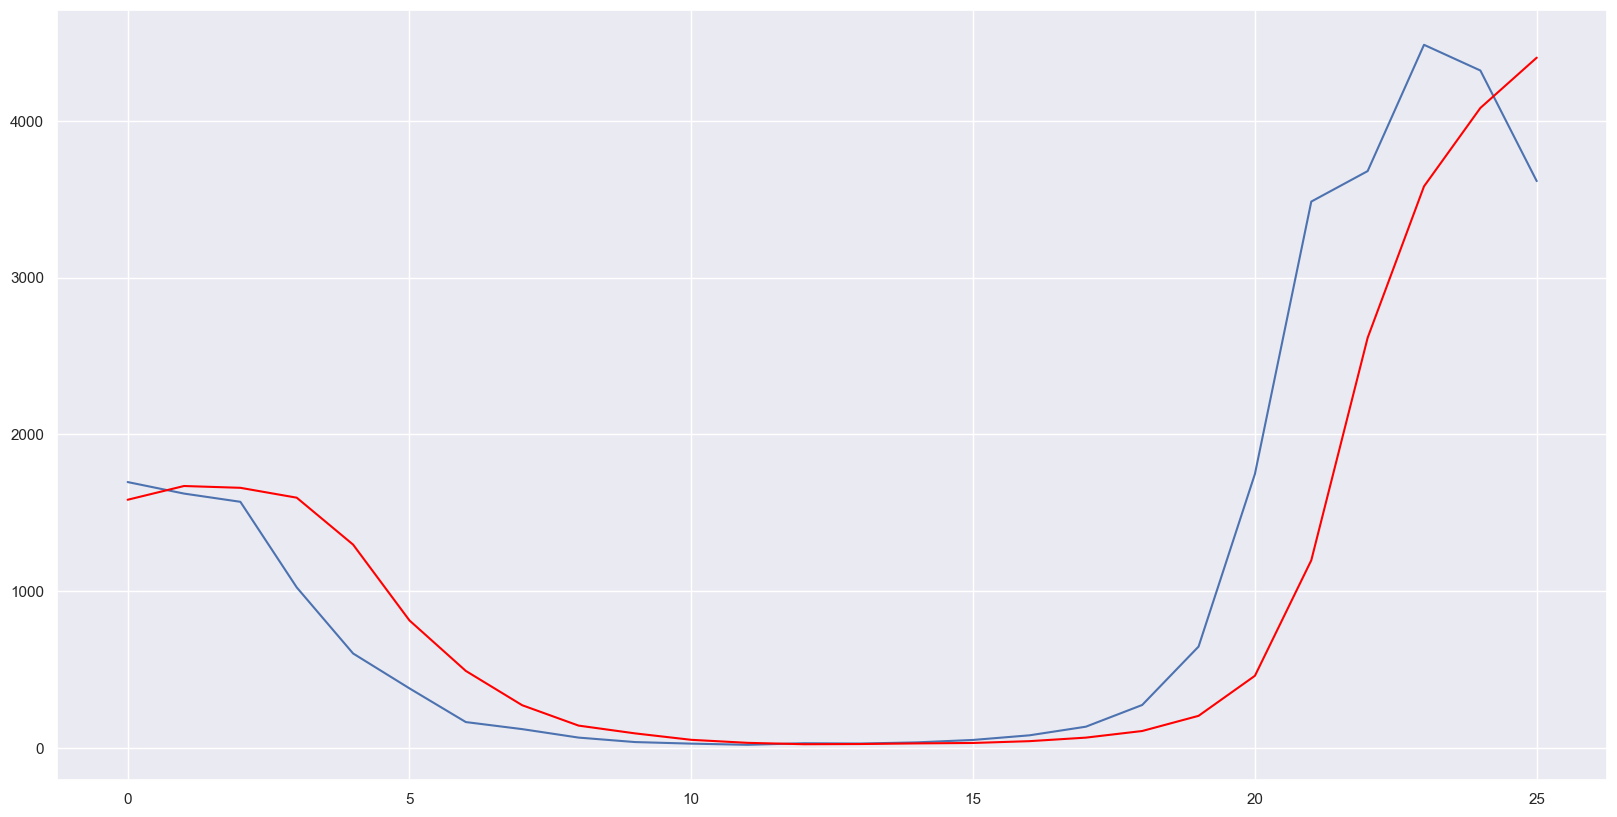

MSE_test: 419381.7572
RMSE_test: 647.5969
MAE_test: 381.3558


In [66]:
X = df_test['Total Cases']
window = 2
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window, length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    # print(f'predicted={yhat}, actual={obs}')

# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

MSE_test = round(mean_squared_error(df_test['Total Cases'][2:], predictions),4)
RMSE_test = round(mean_squared_error(df_test['Total Cases'][2:], predictions, squared=False),4)
MAE_test = round(mean_absolute_error(df_test['Total Cases'][2:], predictions),4)
print(f'MSE_test: {MSE_test}')
print(f'RMSE_test: {RMSE_test}')
print(f'MAE_test: {MAE_test}')

predicted=12.75, actual=44.0
predicted=30.25, actual=43.5
predicted=43.75, actual=26.0
predicted=34.75, actual=42.5
predicted=34.25, actual=52.5
predicted=47.5, actual=46.5
predicted=49.5, actual=105.0
predicted=75.75, actual=248.5
predicted=176.75, actual=510.0
predicted=379.25, actual=1159.5
predicted=834.75, actual=2275.5
predicted=1717.5, actual=3945.0
predicted=3110.25, actual=4324.5
predicted=4134.75, actual=2977.0
predicted=3650.75, actual=1779.5
predicted=2378.25, actual=1034.0
predicted=1406.75, actual=613.0
predicted=823.5, actual=275.5
predicted=444.25, actual=87.5
predicted=181.5, actual=24.5
predicted=56.0, actual=12.5
predicted=18.5, actual=14.0
predicted=13.25, actual=8.0
predicted=11.0, actual=10.5
predicted=9.25, actual=7.5
predicted=9.0, actual=20.5
predicted=14.0, actual=53.5
predicted=37.0, actual=49.0
predicted=51.25, actual=83.0
predicted=66.0, actual=166.5
predicted=124.75, actual=228.0
predicted=197.25, actual=471.0
predicted=349.5, actual=1043.0
predicted=757.0

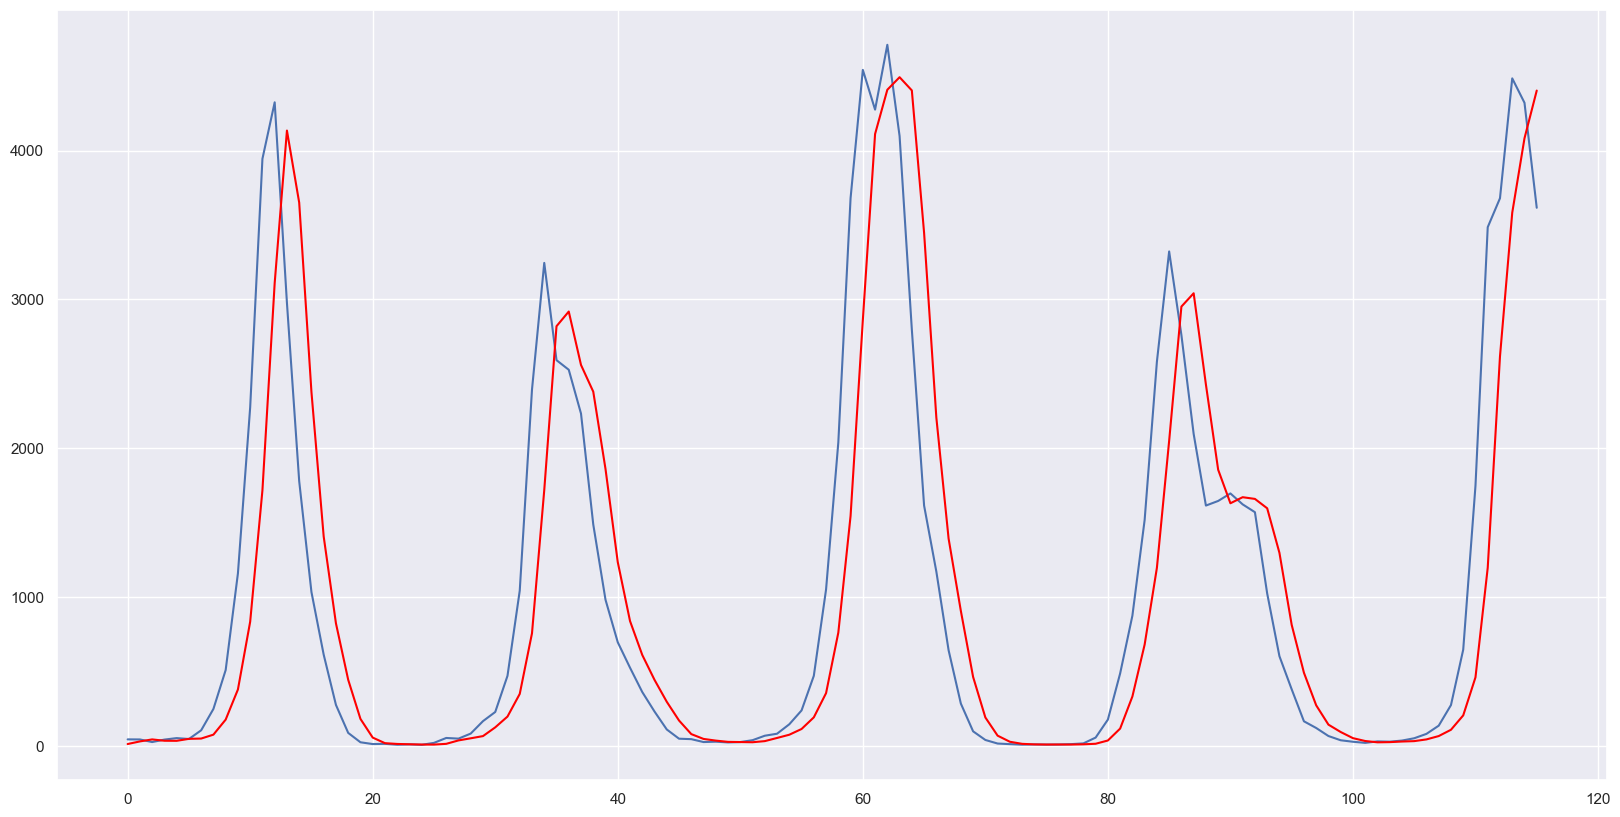

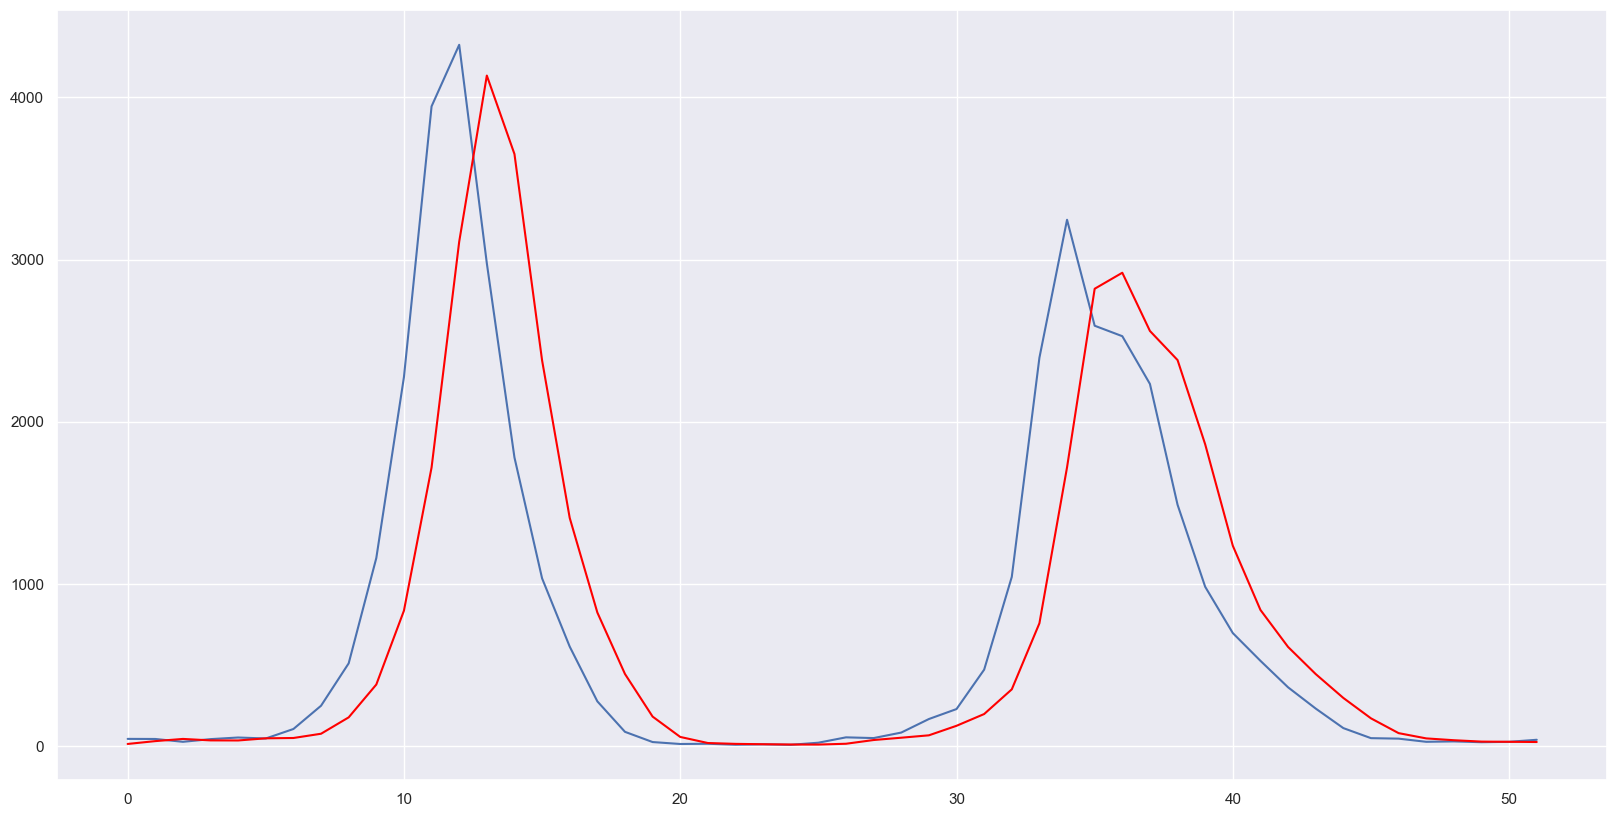

In [10]:
X = df_flu_pre_COVID['Total Cases']
window = 2
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window, length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print(f'predicted={yhat}, actual={obs}')

evaluate_model(test, predictions)

# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# zoom plot
plt.plot(test[0:52])
plt.plot(predictions[0:52], color='red')
plt.show()

# Moving Average - Pre-COVID - 3 weeks ahead

In [11]:
df_flu_pre_COVID = df_flu_pre_COVID.resample('3W').mean()

predicted=12.75, actual=43.75
predicted=30.125, actual=26.0
predicted=34.875, actual=47.5
predicted=36.75, actual=46.5
predicted=47.0, actual=176.75
predicted=111.625, actual=510.0
predicted=343.375, actual=1717.5
predicted=1113.75, actual=3945.0
predicted=2831.25, actual=3650.75
predicted=3797.875, actual=1779.5
predicted=2715.125, actual=823.5
predicted=1301.5, actual=275.5
predicted=549.5, actual=56.0
predicted=165.75, actual=12.5
predicted=34.25, actual=11.0
predicted=11.75, actual=10.5
predicted=10.75, actual=14.0
predicted=12.25, actual=53.5
predicted=33.75, actual=66.0
predicted=59.75, actual=166.5
predicted=116.25, actual=349.5
predicted=258.0, actual=1043.0
predicted=696.25, actual=2820.0
predicted=1931.5, actual=2592.0
predicted=2706.0, actual=2380.25
predicted=2486.125, actual=1488.0
predicted=1934.125, actual=839.25
predicted=1163.625, actual=525.5
predicted=682.375, actual=296.5
predicted=411.0, actual=110.5
predicted=203.5, actual=47.0
predicted=78.75, actual=26.0
predict

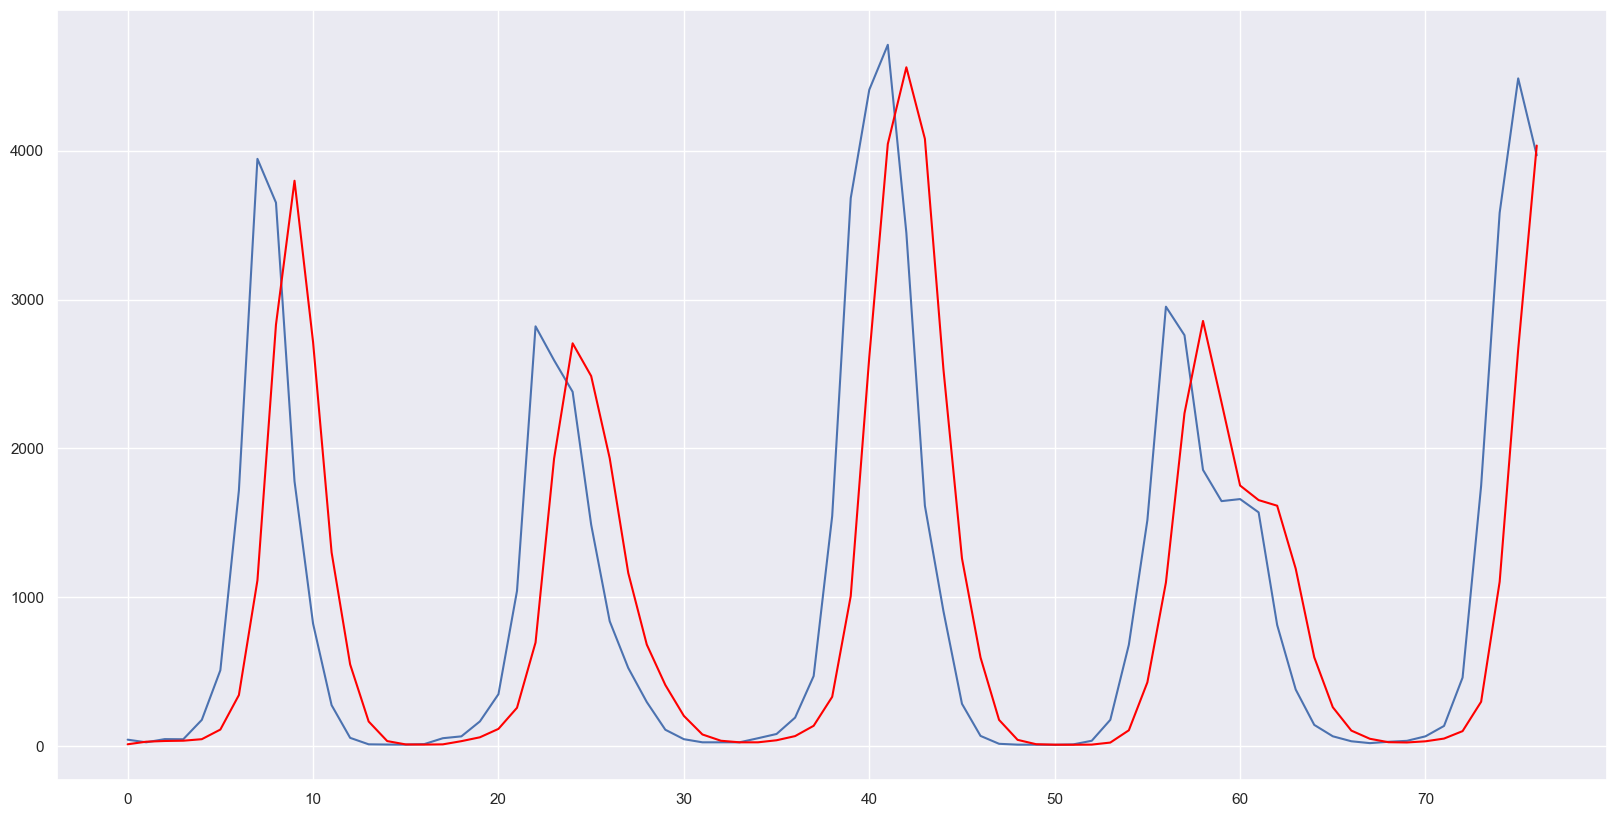

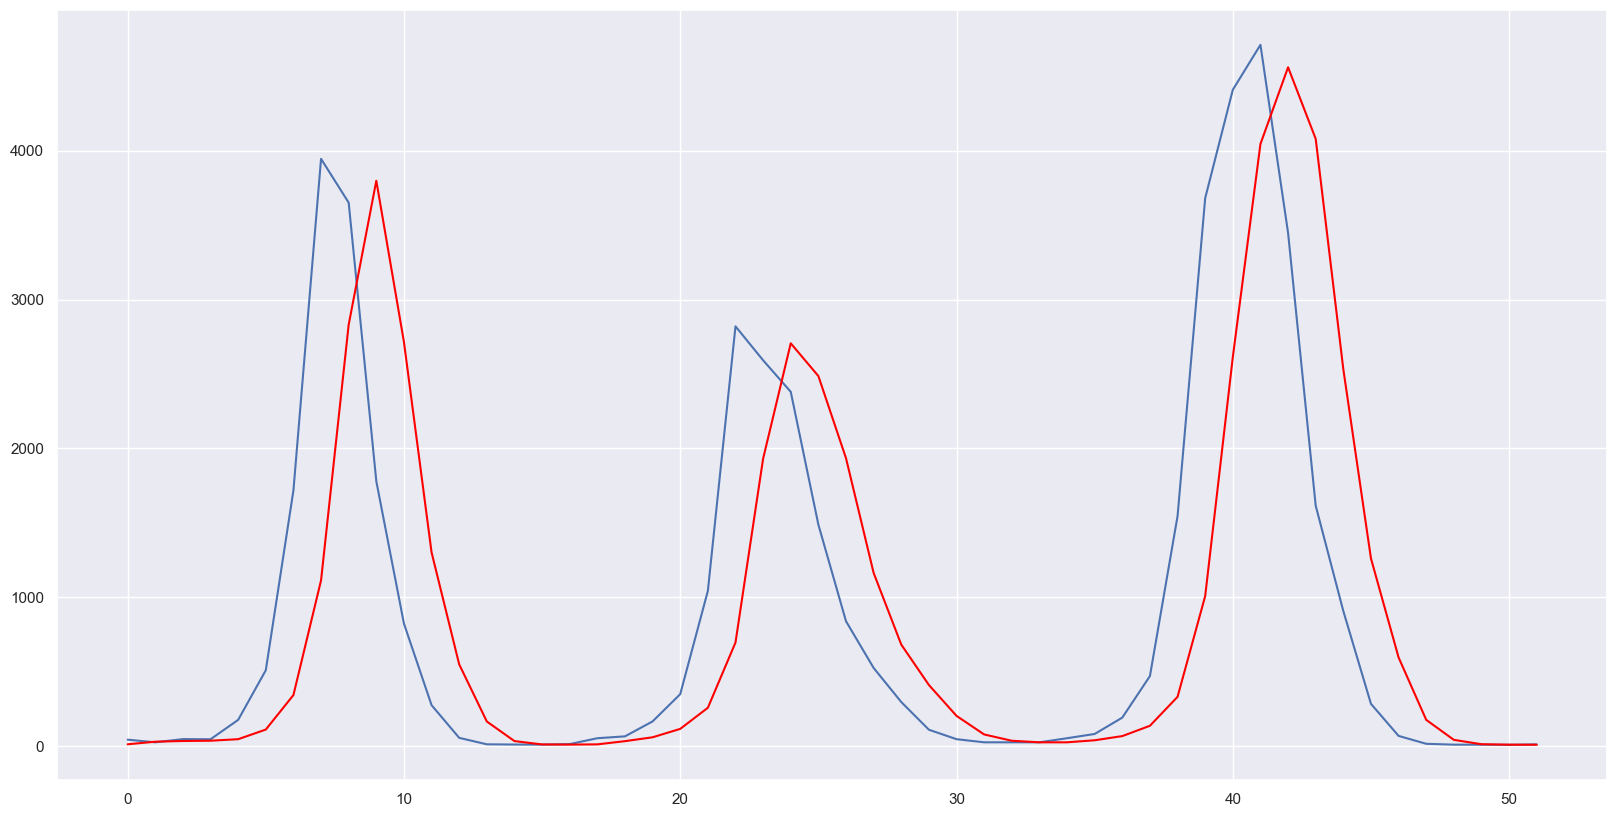

In [12]:
X = df_flu_pre_COVID['Total Cases']
window = 2
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window, length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print(f'predicted={yhat}, actual={obs}')

evaluate_model(test, predictions)

# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# zoom plot
plt.plot(test[0:52])
plt.plot(predictions[0:52], color='red')
plt.show()

# Moving Average - Pre-COVID - 4 weeks ahead

In [13]:
df_flu_pre_COVID = df_flu_pre_COVID.resample('4W').mean()

predicted=12.75, actual=43.75
predicted=30.125, actual=36.75
predicted=40.25, actual=46.5
predicted=41.625, actual=176.75
predicted=111.625, actual=1113.75
predicted=645.25, actual=3945.0
predicted=2529.375, actual=3650.75
predicted=3797.875, actual=1301.5
predicted=2476.125, actual=275.5
predicted=788.5, actual=56.0
predicted=165.75, actual=11.75
predicted=33.875, actual=10.5
predicted=11.125, actual=14.0
predicted=12.25, actual=59.75
predicted=36.875, actual=166.5
predicted=113.125, actual=349.5
predicted=258.0, actual=1931.5
predicted=1140.5, actual=2592.0
predicted=2261.75, actual=2380.25
predicted=2486.125, actual=1163.625
predicted=1771.9375, actual=525.5
predicted=844.5625, actual=296.5
predicted=411.0, actual=78.75
predicted=187.625, actual=26.0
predicted=52.375, actual=26.0
predicted=26.0, actual=39.75
predicted=32.875, actual=82.0
predicted=60.875, actual=192.0
predicted=137.0, actual=1008.25
predicted=600.125, actual=3681.0
predicted=2344.625, actual=4409.0
predicted=4045.0,

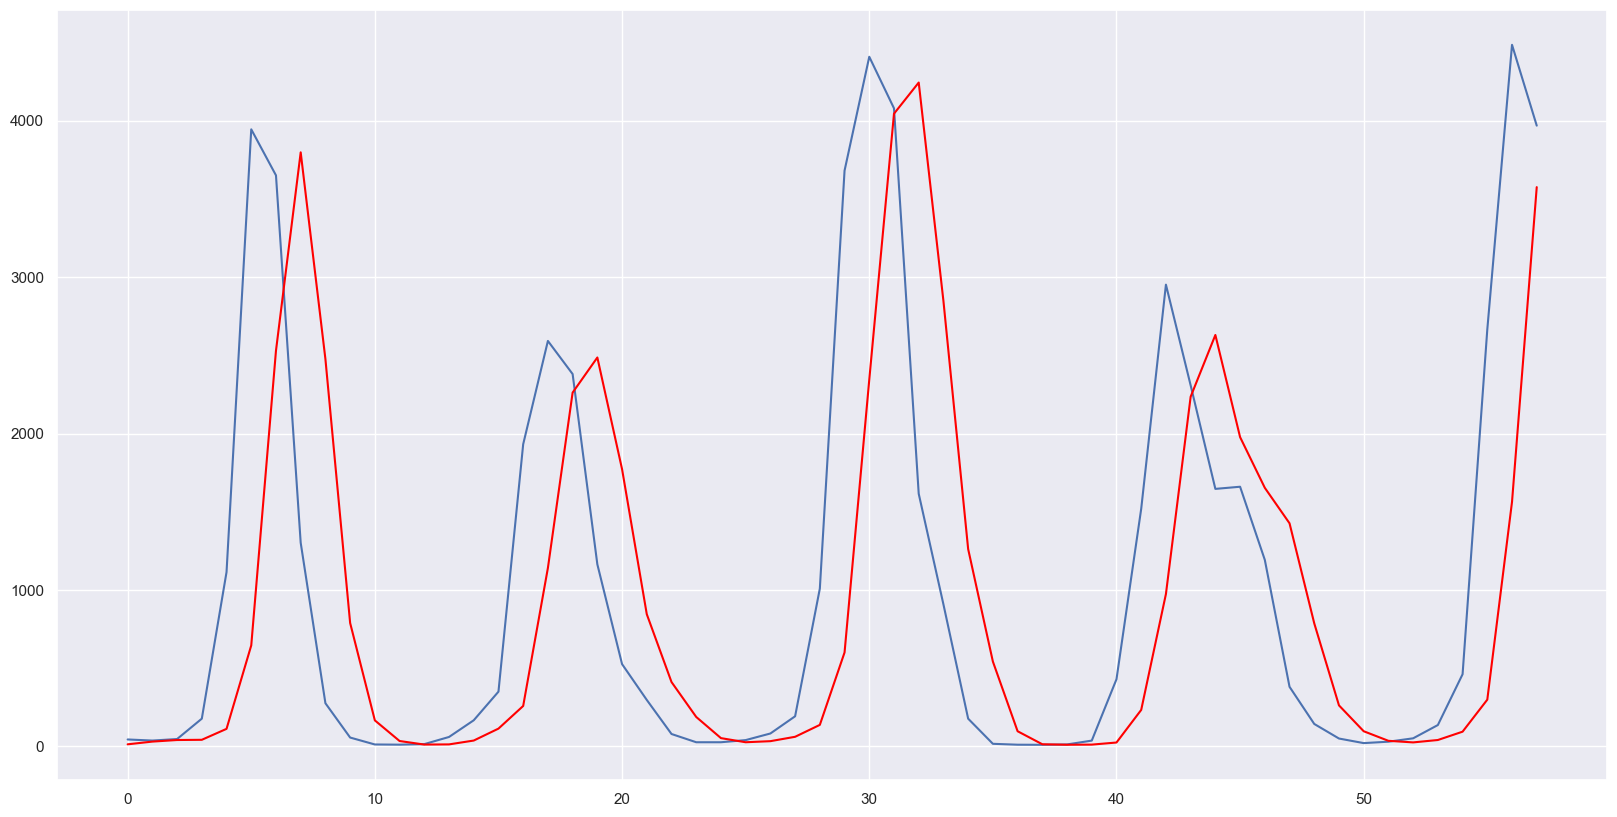

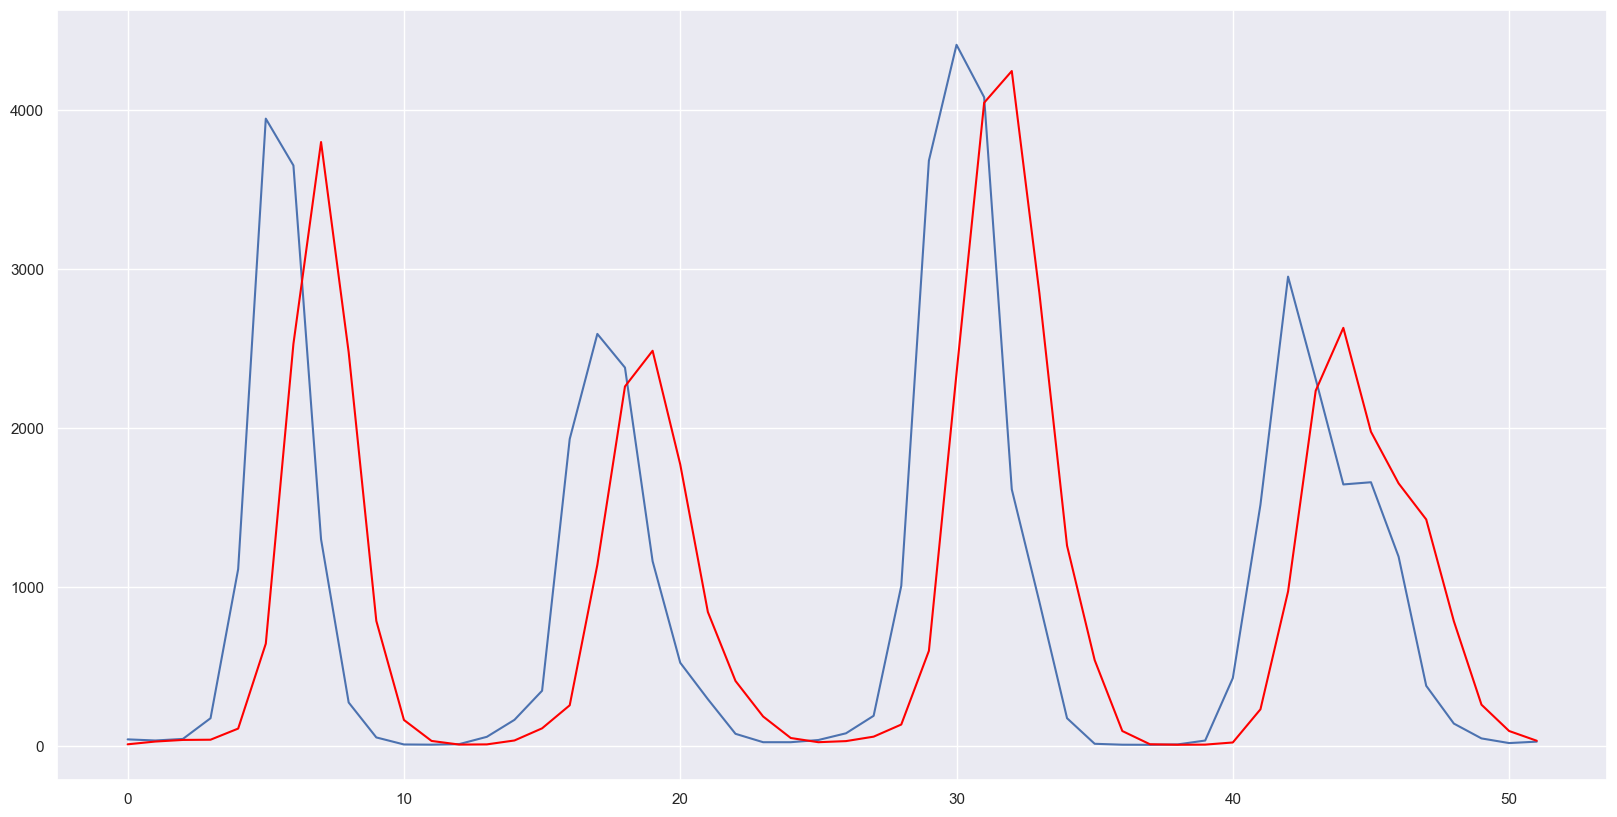

In [14]:
X = df_flu_pre_COVID['Total Cases']
window = 2
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window, length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print(f'predicted={yhat}, actual={obs}')

evaluate_model(test, predictions)

# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# zoom plot
plt.plot(test[0:52])
plt.plot(predictions[0:52], color='red')
plt.show()

# Dataset - Post-COVID

In [ ]:
df_flu = pickle.load(open(r"..\data\flu_cases\df_flu_total.pkl", "rb" ))

# Moving Average - Post-COVID - 1 week into future

In [ ]:
import numpy as np
from numpy import mean
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [20, 10]

predicted=13.5, actual=15.0
predicted=16.5, actual=29.0
predicted=22.0, actual=59.0
predicted=44.0, actual=50.0
predicted=54.5, actual=37.0
predicted=43.5, actual=26.0
predicted=31.5, actual=26.0
predicted=26.0, actual=40.0
predicted=33.0, actual=45.0
predicted=42.5, actual=53.0
predicted=49.0, actual=52.0
predicted=52.5, actual=30.0
predicted=41.0, actual=63.0
predicted=46.5, actual=95.0
predicted=79.0, actual=115.0
predicted=105.0, actual=183.0
predicted=149.0, actual=314.0
predicted=248.5, actual=375.0
predicted=344.5, actual=645.0
predicted=510.0, actual=933.0
predicted=789.0, actual=1386.0
predicted=1159.5, actual=2067.0
predicted=1726.5, actual=2484.0
predicted=2275.5, actual=3697.0
predicted=3090.5, actual=4193.0
predicted=3945.0, actual=4655.0
predicted=4424.0, actual=3994.0
predicted=4324.5, actual=3132.0
predicted=3563.0, actual=2822.0
predicted=2977.0, actual=2045.0
predicted=2433.5, actual=1514.0
predicted=1779.5, actual=1146.0
predicted=1330.0, actual=922.0
predicted=1034.

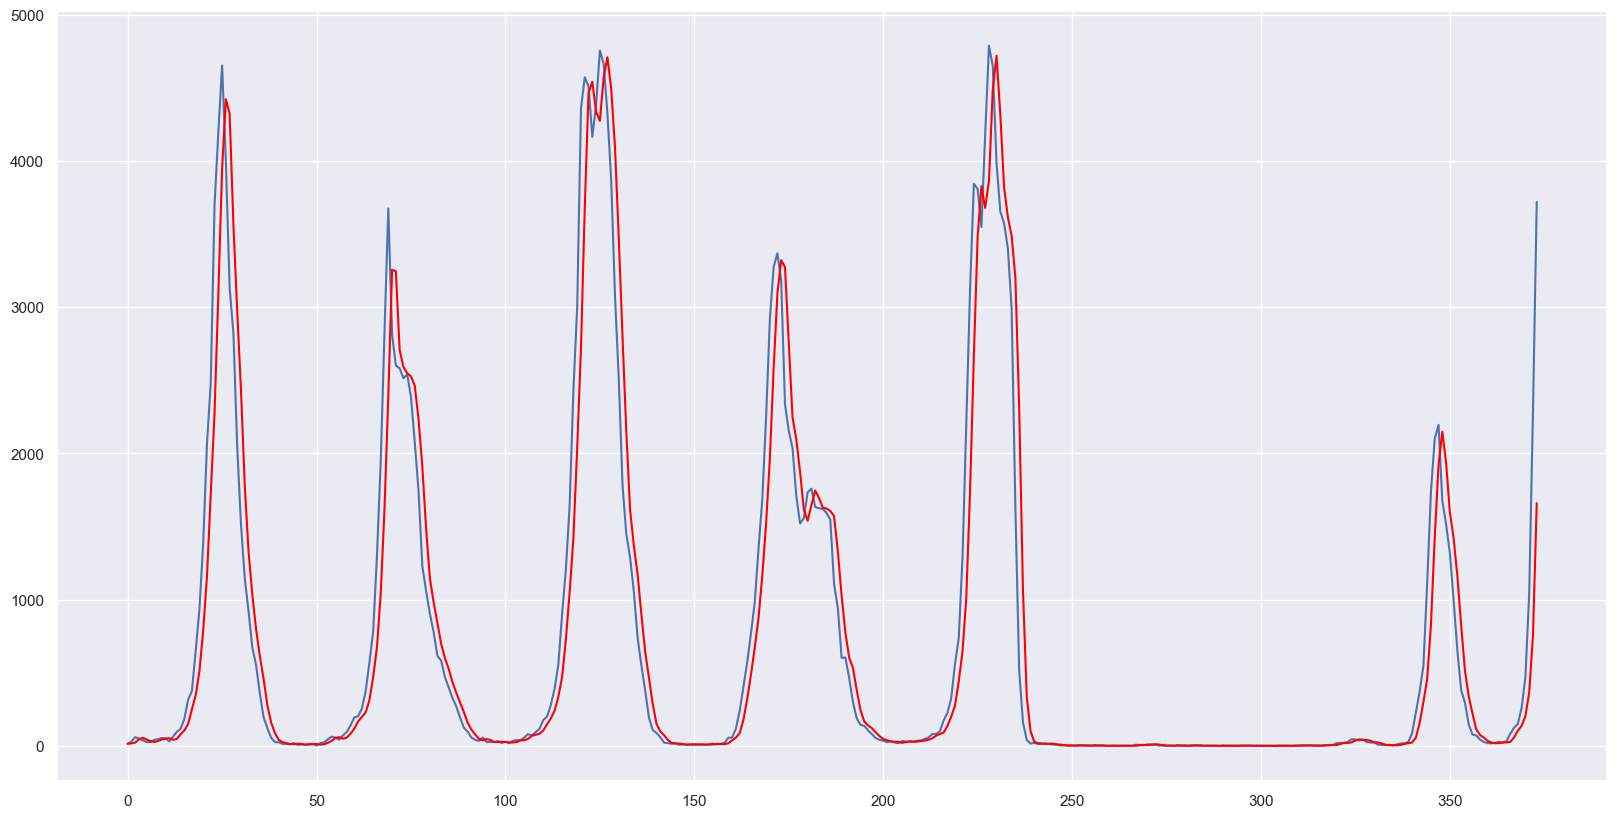

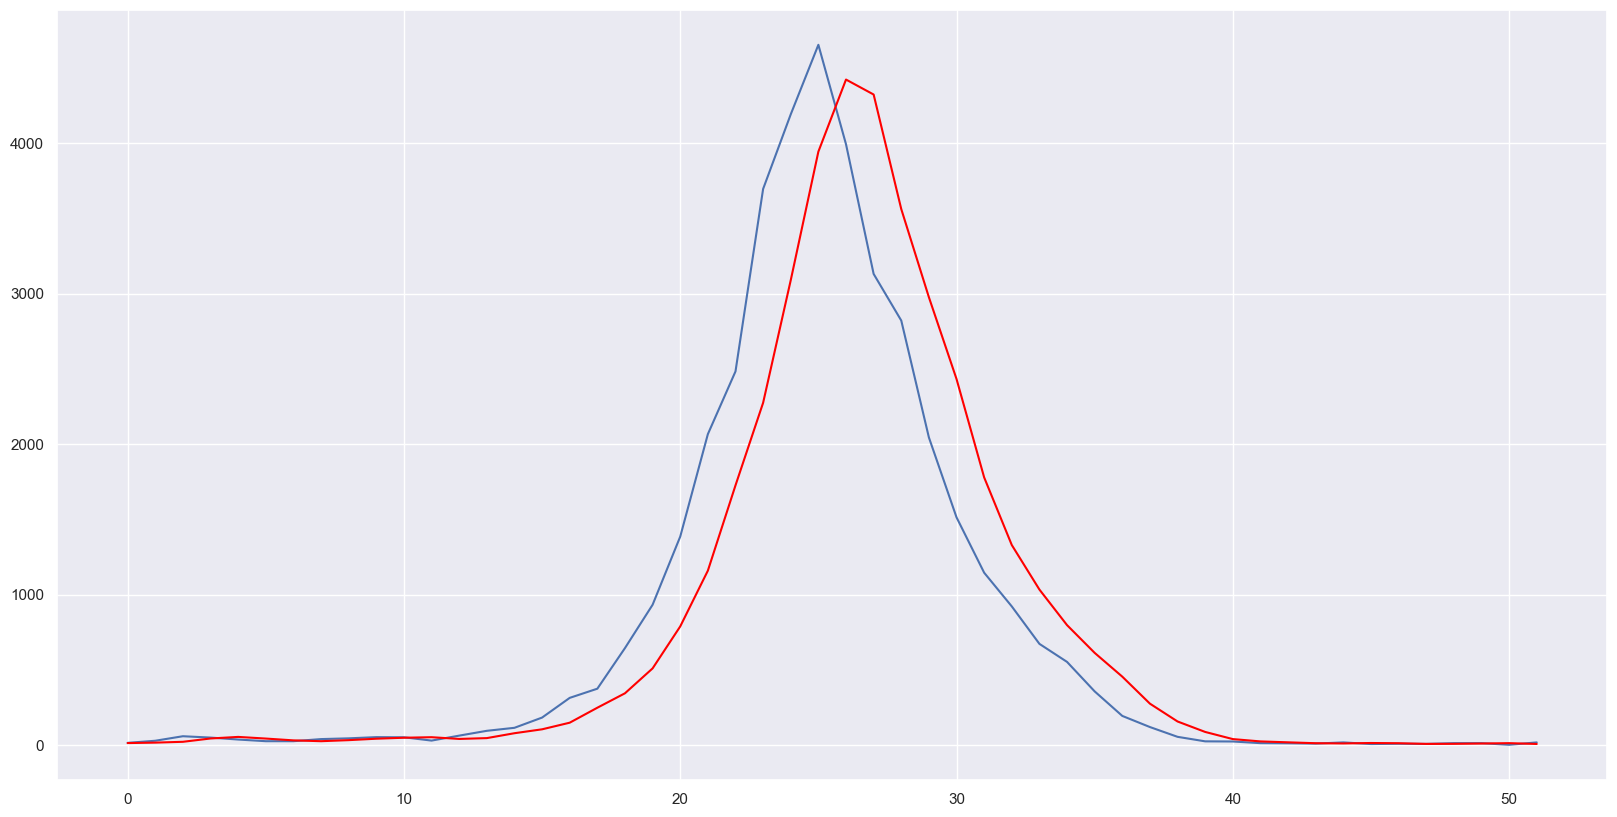

In [ ]:
X = df_flu['Total Cases']
window = 2
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window, length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print(f'predicted={yhat}, actual={obs}')

# evaluate
MSE = round(mean_squared_error(test, predictions),3)
RMSE = round(mean_squared_error(test, predictions, squared=False),3)
MAE = round(mean_absolute_error(test, predictions),3)

print(f'Test MSE: {MSE}')   # weights large errors more than smaller ones, good for penalizing big mistakes, loses unit because squared
print(f'Test RMSE: {RMSE}')  # more interpretable than MSE because avoids losing units. Also sensitive to outliers
print(f'Test MAE: {MAE}')   # doesn't penalize large errors as much

# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# zoom plot
plt.plot(test[0:52])
plt.plot(predictions[0:52], color='red')
plt.show()

In [ ]:
import numpy as np

# Moving Average - Post-COVID - 2 weeks into future

In [ ]:
df_flu = pickle.load(open(r"..\data\flu_cases\df_flu_total.pkl", "rb" ))

In [ ]:
import numpy as np
from numpy import mean
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [20, 10]

In [ ]:
df_flu = df_flu.resample('2W').mean()

<AxesSubplot: xlabel='Week Ending'>

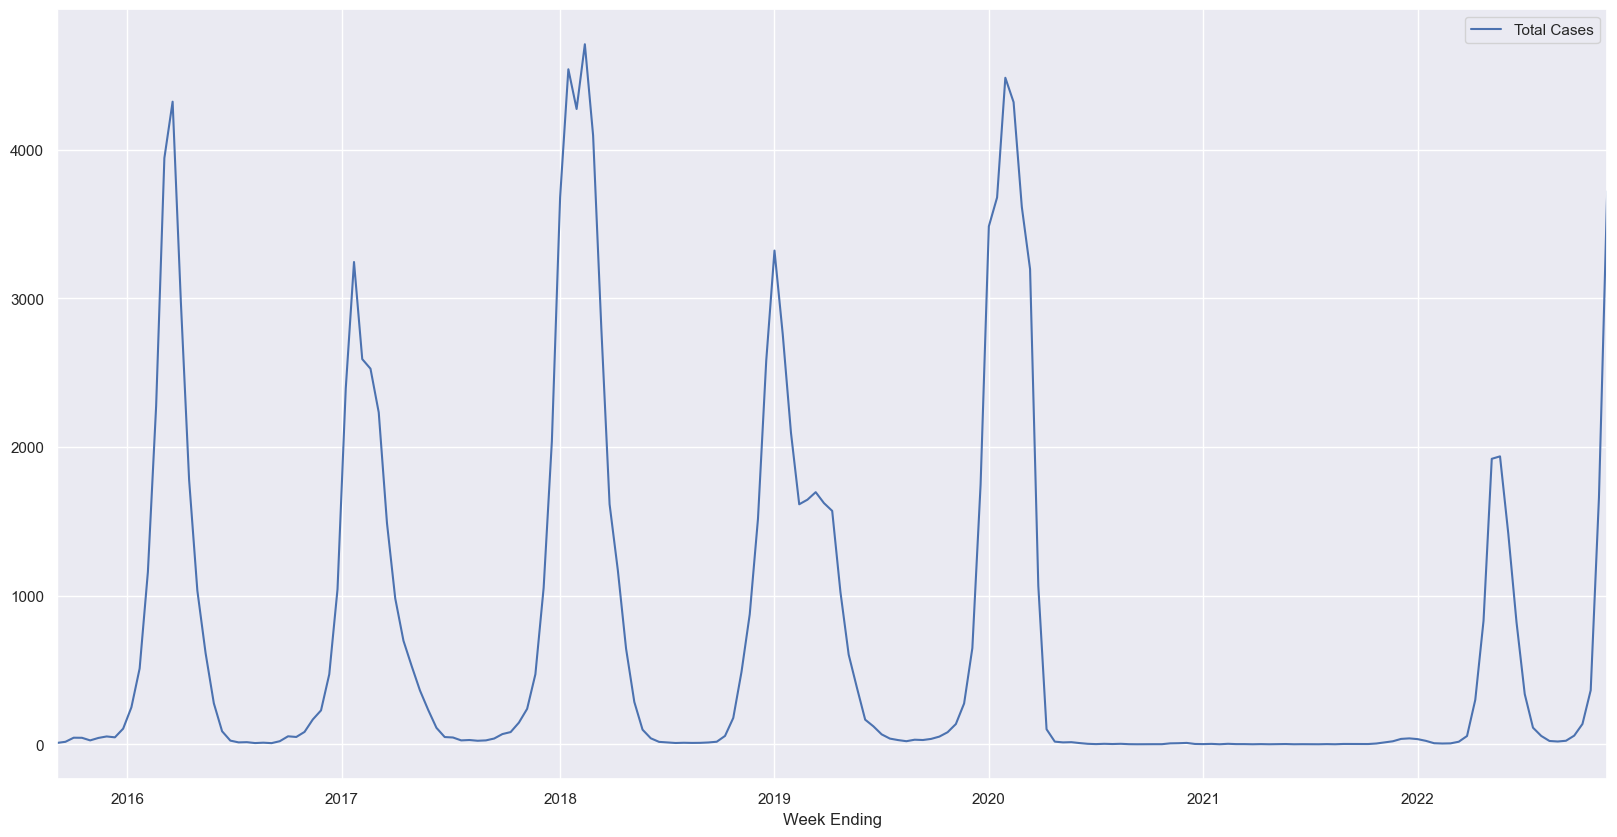

In [ ]:
df_flu.plot()

predicted=12.75, actual=44.0
predicted=30.25, actual=43.5
predicted=43.75, actual=26.0
predicted=34.75, actual=42.5
predicted=34.25, actual=52.5
predicted=47.5, actual=46.5
predicted=49.5, actual=105.0
predicted=75.75, actual=248.5
predicted=176.75, actual=510.0
predicted=379.25, actual=1159.5
predicted=834.75, actual=2275.5
predicted=1717.5, actual=3945.0
predicted=3110.25, actual=4324.5
predicted=4134.75, actual=2977.0
predicted=3650.75, actual=1779.5
predicted=2378.25, actual=1034.0
predicted=1406.75, actual=613.0
predicted=823.5, actual=275.5
predicted=444.25, actual=87.5
predicted=181.5, actual=24.5
predicted=56.0, actual=12.5
predicted=18.5, actual=14.0
predicted=13.25, actual=8.0
predicted=11.0, actual=10.5
predicted=9.25, actual=7.5
predicted=9.0, actual=20.5
predicted=14.0, actual=53.5
predicted=37.0, actual=49.0
predicted=51.25, actual=83.0
predicted=66.0, actual=166.5
predicted=124.75, actual=228.0
predicted=197.25, actual=471.0
predicted=349.5, actual=1043.0
predicted=757.0

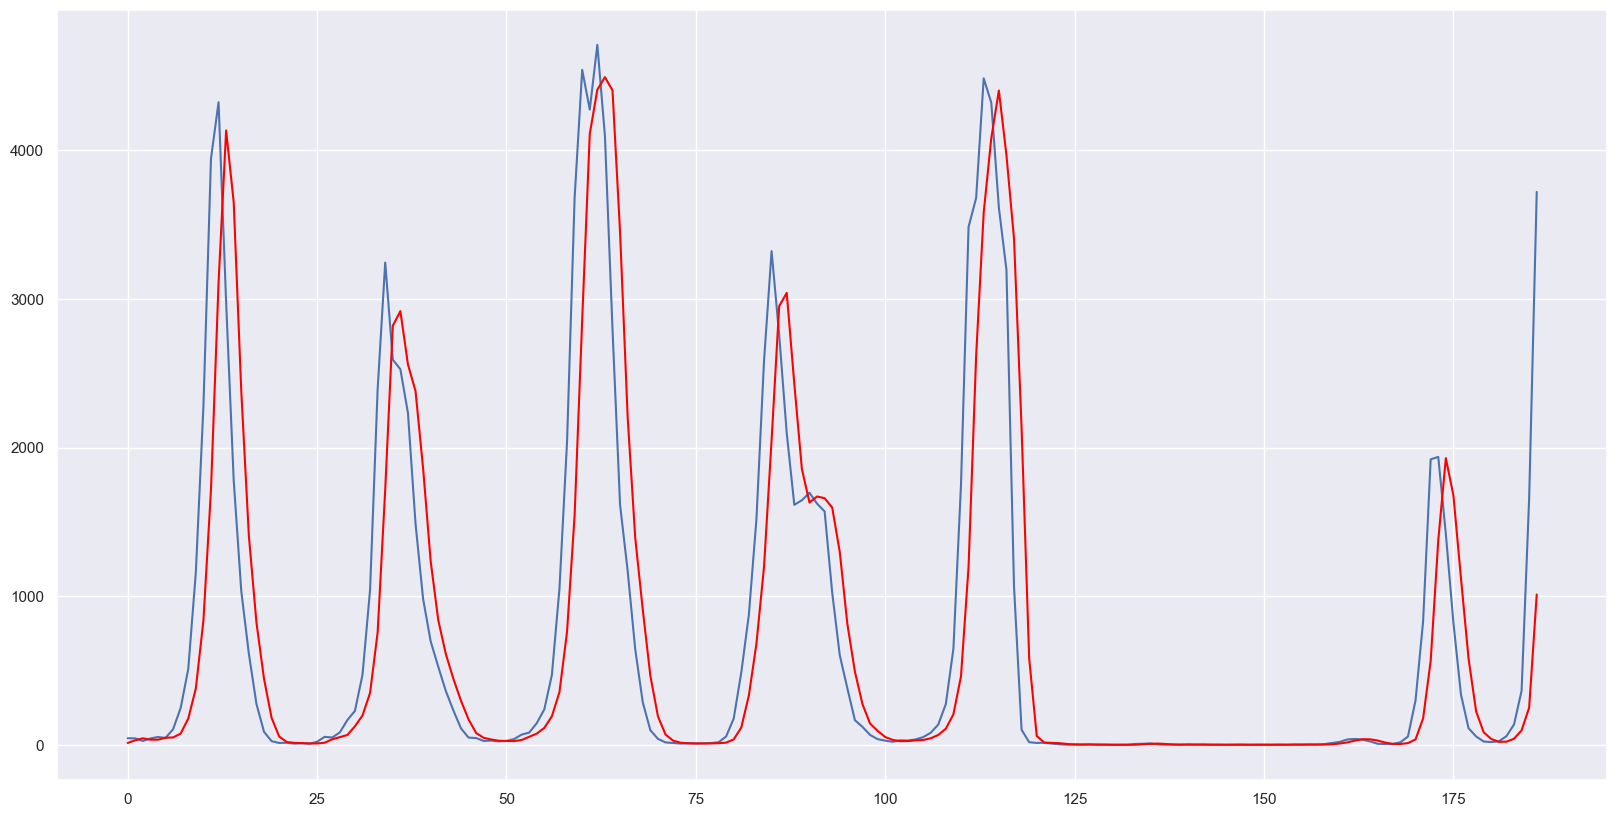

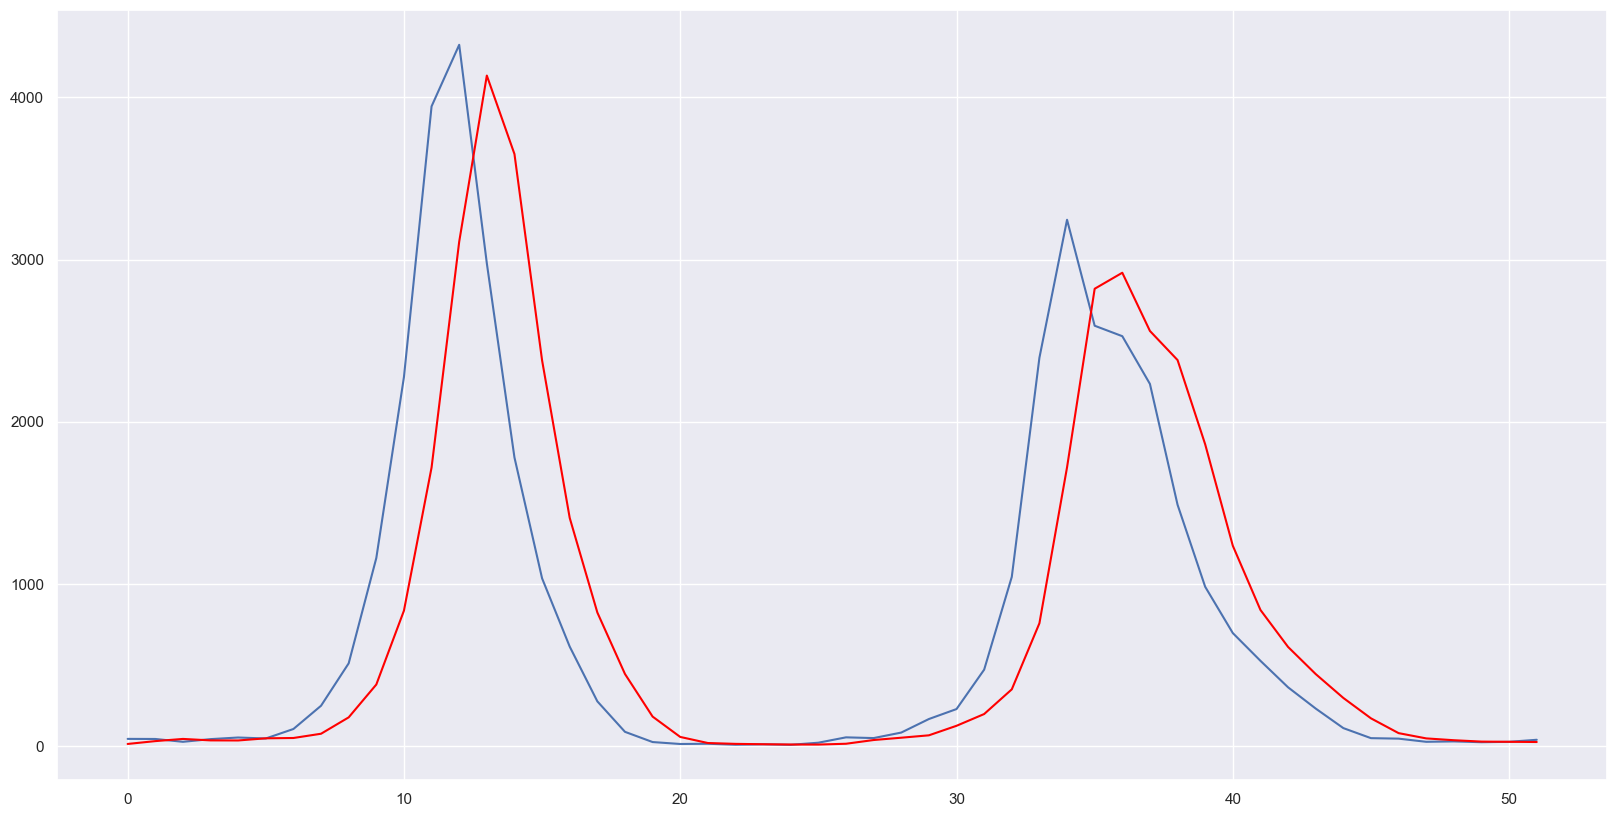

In [ ]:
X = df_flu['Total Cases']
window = 2
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window, length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print(f'predicted={yhat}, actual={obs}')

# evaluate
MSE = round(mean_squared_error(test, predictions),3)
RMSE = round(mean_squared_error(test, predictions, squared=False),3)
MAE = round(mean_absolute_error(test, predictions),3)

print(f'Test MSE: {MSE}')   # weights large errors more than smaller ones, good for penalizing big mistakes, loses unit because squared
print(f'Test RMSE: {RMSE}')  # more interpretable than MSE because avoids losing units. Also sensitive to outliers
print(f'Test MAE: {MAE}')   # doesn't penalize large errors as much

# can't use MAPE (mean absolute percentage error, because there are zero values in the dataset)


# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# zoom plot
plt.plot(test[0:52])
plt.plot(predictions[0:52], color='red')
plt.show()

In [ ]:
import numpy as np

# Moving Average - Post-COVID - 3 weeks into future

In [ ]:
df_flu = pickle.load(open(r"..\data\flu_cases\df_flu_total.pkl", "rb" ))

In [ ]:
import numpy as np
from numpy import mean
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [20, 10]

In [ ]:
df_flu = df_flu.resample('3W').mean()

In [ ]:
df_flu.head()

,Total Cases
Week Ending,
2015-09-06,9.000000
2015-09-27,20.666667
2015-10-18,48.666667
2015-11-08,30.666667
2015-11-29,50.000000


<AxesSubplot: xlabel='Week Ending'>

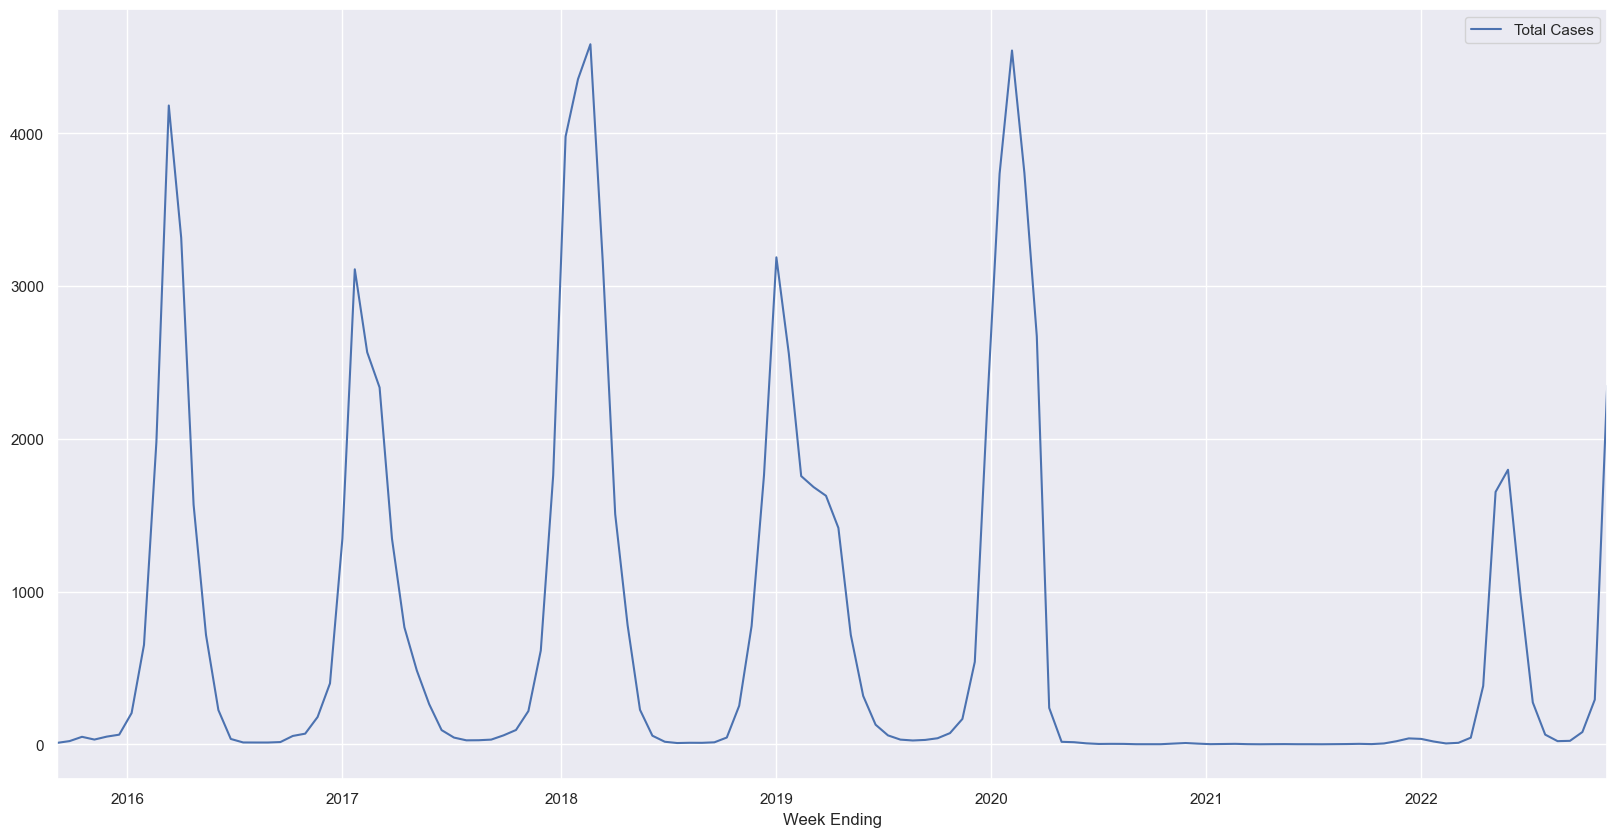

In [ ]:
df_flu.plot()

predicted=14.833333333333334, actual=48.666666666666664
predicted=34.666666666666664, actual=30.666666666666668
predicted=39.666666666666664, actual=50.0
predicted=40.333333333333336, actual=62.666666666666664
predicted=56.33333333333333, actual=204.0
predicted=133.33333333333334, actual=651.0
predicted=427.5, actual=1979.0
predicted=1315.0, actual=4181.666666666667
predicted=3080.3333333333335, actual=3316.0
predicted=3748.8333333333335, actual=1568.3333333333333
predicted=2442.1666666666665, actual=716.0
predicted=1142.1666666666665, actual=223.66666666666666
predicted=469.8333333333333, actual=34.666666666666664
predicted=129.16666666666666, actual=11.666666666666666
predicted=23.166666666666664, actual=11.333333333333334
predicted=11.5, actual=11.333333333333334
predicted=11.333333333333334, actual=14.333333333333334
predicted=12.833333333333334, actual=54.333333333333336
predicted=34.333333333333336, actual=69.33333333333333
predicted=61.83333333333333, actual=178.33333333333334
p

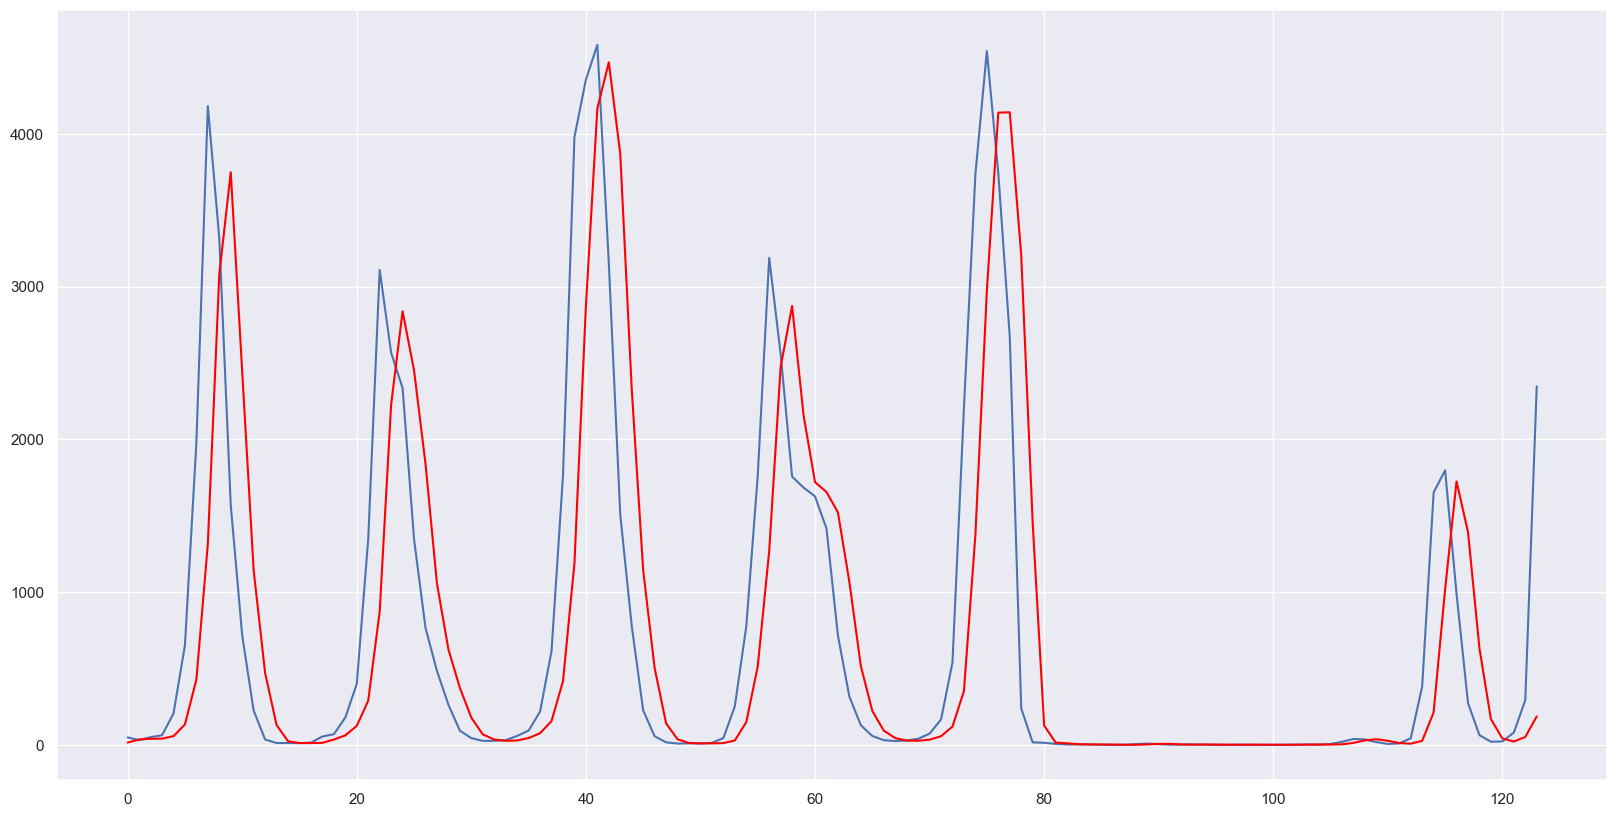

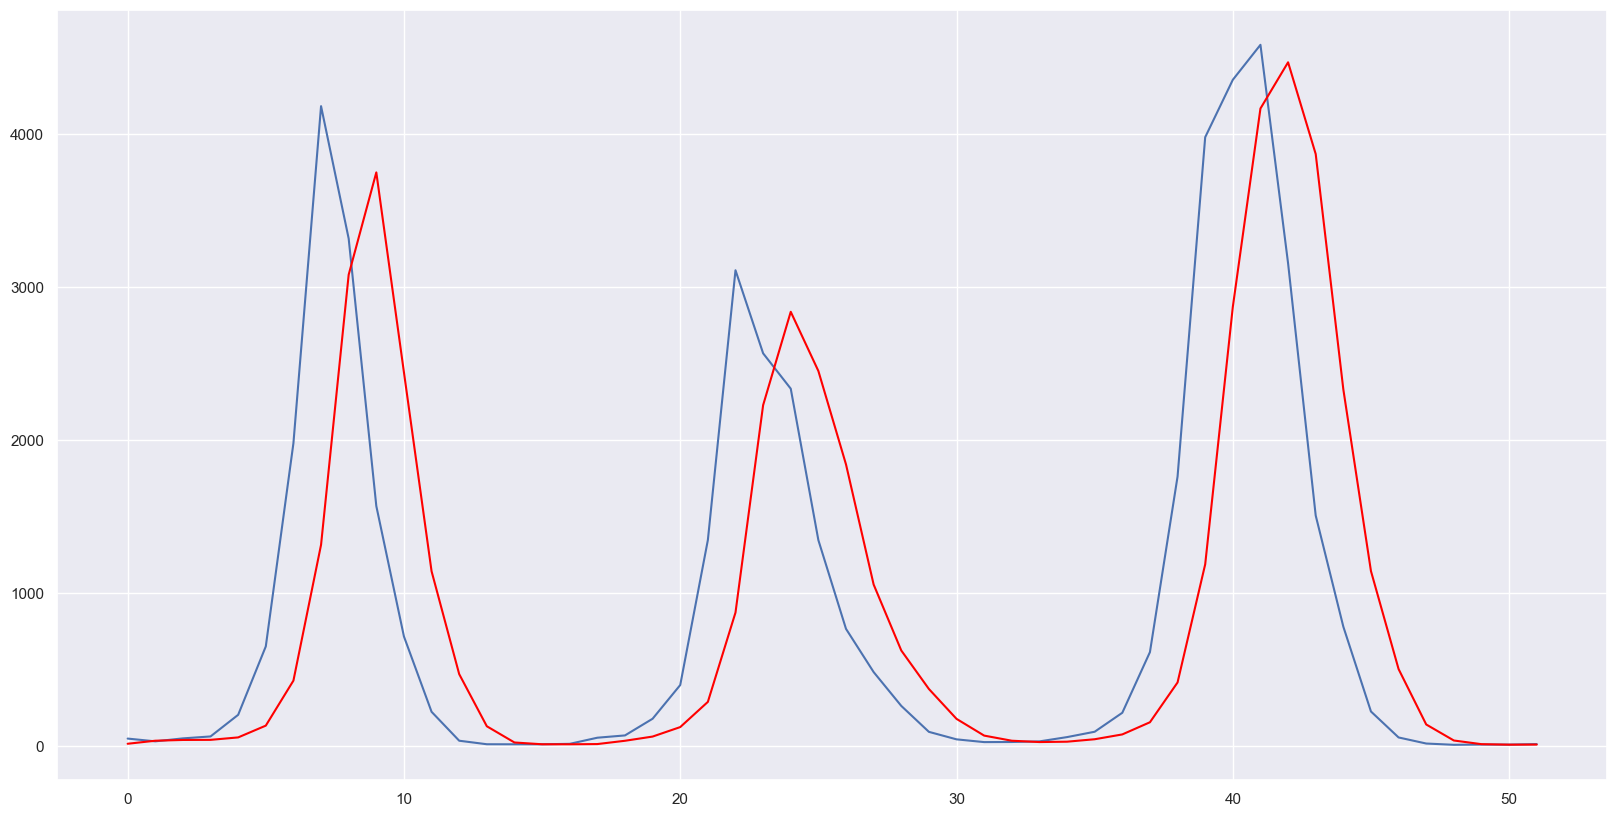

In [ ]:
X = df_flu['Total Cases']
window = 2
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window, length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print(f'predicted={yhat}, actual={obs}')

# evaluate
MSE = round(mean_squared_error(test, predictions),3)
RMSE = round(mean_squared_error(test, predictions, squared=False),3)
MAE = round(mean_absolute_error(test, predictions),3)

print(f'Test MSE: {MSE}')   # weights large errors more than smaller ones, good for penalizing big mistakes, loses unit because squared
print(f'Test RMSE: {RMSE}')  # more interpretable than MSE because avoids losing units. Also sensitive to outliers
print(f'Test MAE: {MAE}')   # doesn't penalize large errors as much

# can't use MAPE (mean absolute percentage error, because there are zero values in the dataset)


# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# zoom plot
plt.plot(test[0:52])
plt.plot(predictions[0:52], color='red')
plt.show()

# Moving Average - Post-COVID - 4 weeks into future

In [ ]:
import pickle
df_flu = pickle.load(open(r"..\data\flu_cases\df_flu_total.pkl", "rb" ))

In [ ]:
df_flu = df_flu.resample('M').mean()

In [ ]:
df_flu.head()

,Total Cases
Week Ending,
2015-09-30,17.75
2015-10-31,39.60
2015-11-30,47.50
2015-12-31,75.75
2016-01-31,490.00


<AxesSubplot: xlabel='Week Ending'>

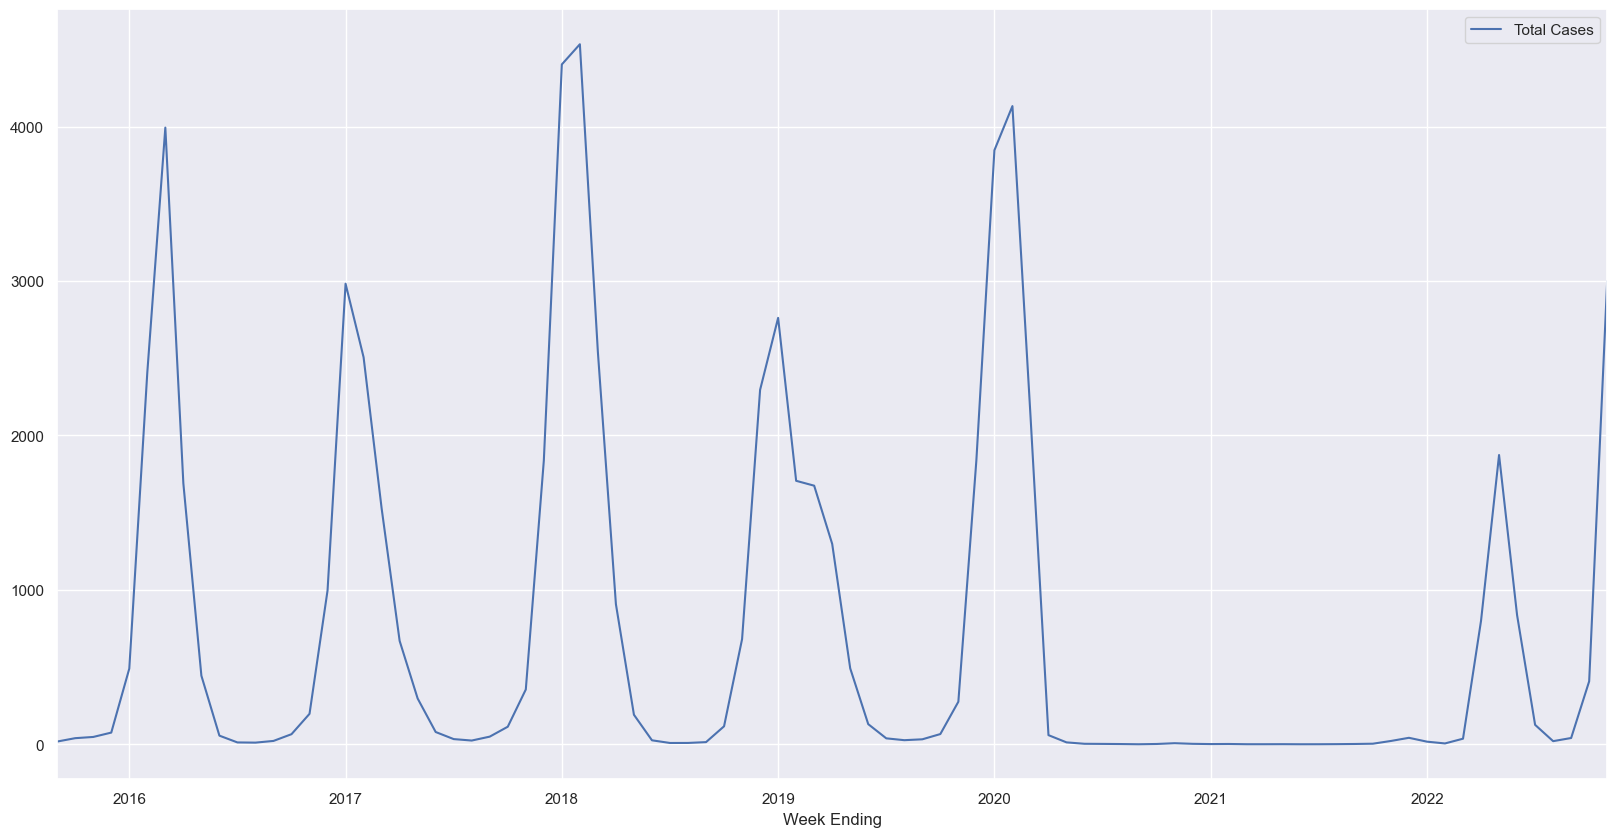

In [ ]:
df_flu.plot()

In [ ]:
def evaluate_model(test, predictions_test, train=None, predictions_train=None):
    """
    Calculate MSE_train, RMSE_train, MAE_train, and MSE_test, RMSE_test, MAE_test to evaluate time series forecast

    MSE - weights large errors more than smaller ones, good for penalizing large errors, loses unit because squared
    RMSE - more interpretable than MSE because avoids losing units, also penalizes large errors
    MAE - doesn't penalize large errors as much

    Args:
        train (list of int, optional): values of the training set
        test (list of int): values of the test set
        predictions_train (list of int, optional): predicted values for the training set
        predictions_test (list of int, optional): predicted values for the test set

    Returns:
        print out of training and test scores

   """ 
    
    if train != None:
        # Evaluate training set
        MSE_train = round(mean_squared_error(train, predictions_train),3)
        RMSE_train = round(mean_squared_error(train, predictions_train, squared=False),3)
        MAE_train = round(mean_absolute_error(train, predictions_train),3)

        print(f'Train MSE: {MSE_train}')
        print(f'Train RMSE: {RMSE_train}')
        print(f'Train MAE: {MAE_train}') 
    
    # Evaluate test set
    MSE_test = round(mean_squared_error(test, predictions_test),3)
    RMSE_test = round(mean_squared_error(test, predictions_test, squared=False),3)
    MAE_test = round(mean_absolute_error(test, predictions_test),3)

    print(f'Test MSE: {MSE_test}')
    print(f'Test RMSE: {RMSE_test}')
    print(f'Test MAE: {MAE_test}')

In [ ]:
type(test)

list

predicted=28.675, actual=47.5
predicted=43.55, actual=75.75
predicted=61.625, actual=490.0
predicted=282.875, actual=2408.5
predicted=1449.25, actual=3993.5
predicted=3201.0, actual=1689.8
predicted=2841.65, actual=444.25
predicted=1067.025, actual=56.0
predicted=250.125, actual=12.0
predicted=34.0, actual=10.75
predicted=11.375, actual=21.75
predicted=16.25, actual=65.4
predicted=43.575, actual=197.25
predicted=131.325, actual=996.0
predicted=596.625, actual=2982.5
predicted=1989.25, actual=2506.25
predicted=2744.375, actual=1528.5
predicted=2017.375, actual=669.6
predicted=1099.05, actual=296.5
predicted=483.05, actual=79.5
predicted=188.0, actual=33.6
predicted=56.55, actual=24.25
predicted=28.925, actual=49.6
predicted=36.925, actual=113.75
predicted=81.675, actual=354.75
predicted=234.25, actual=1836.8
predicted=1095.775, actual=4402.75
predicted=3119.775, actual=4533.25
predicted=4468.0, actual=2539.0
predicted=3536.125, actual=907.25
predicted=1723.125, actual=191.25
predicted=5

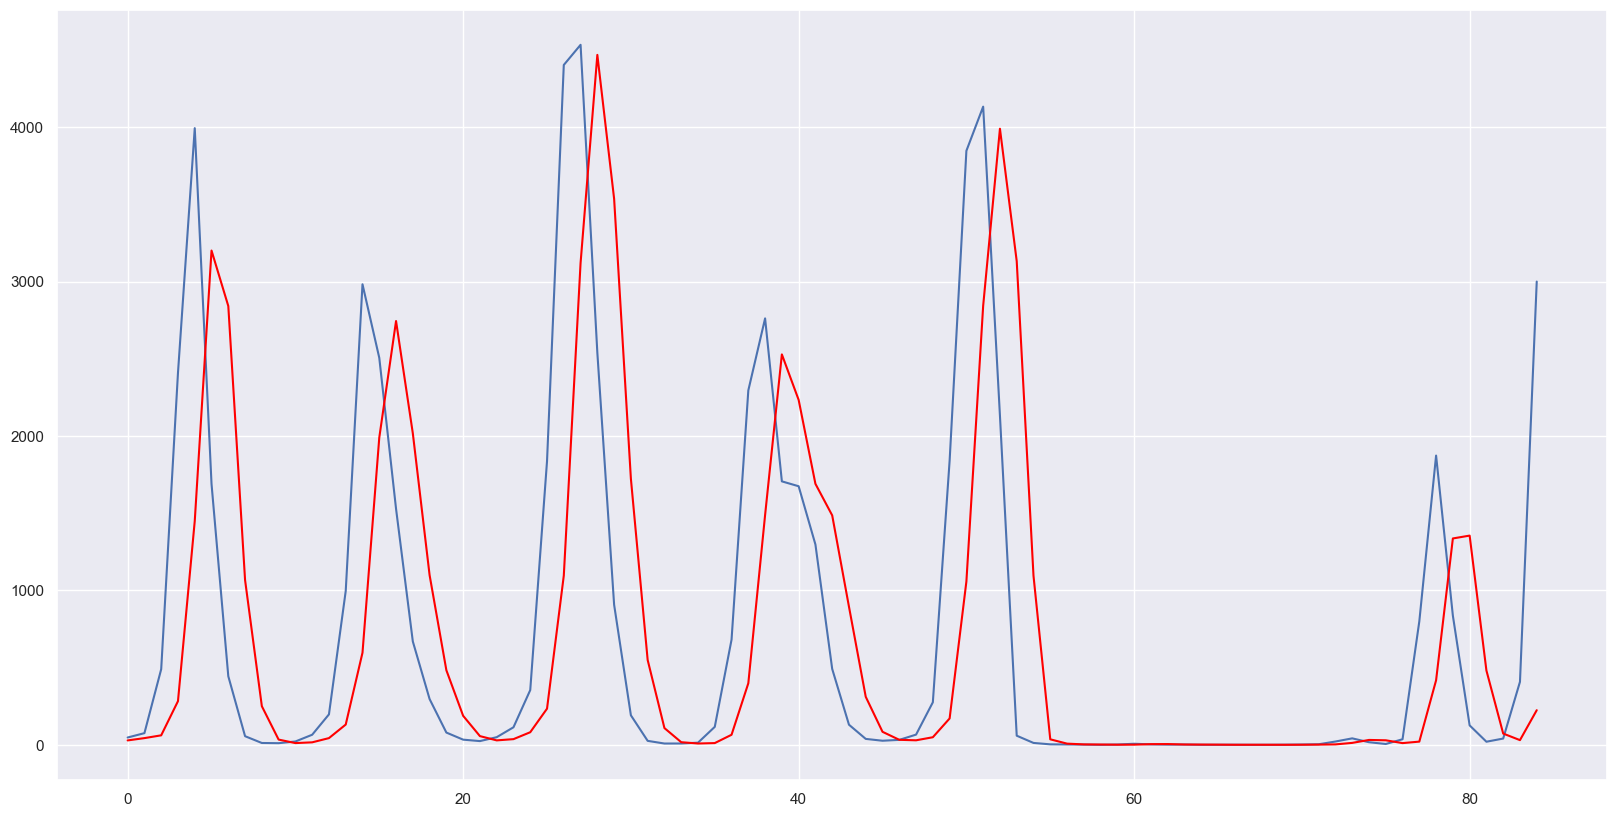

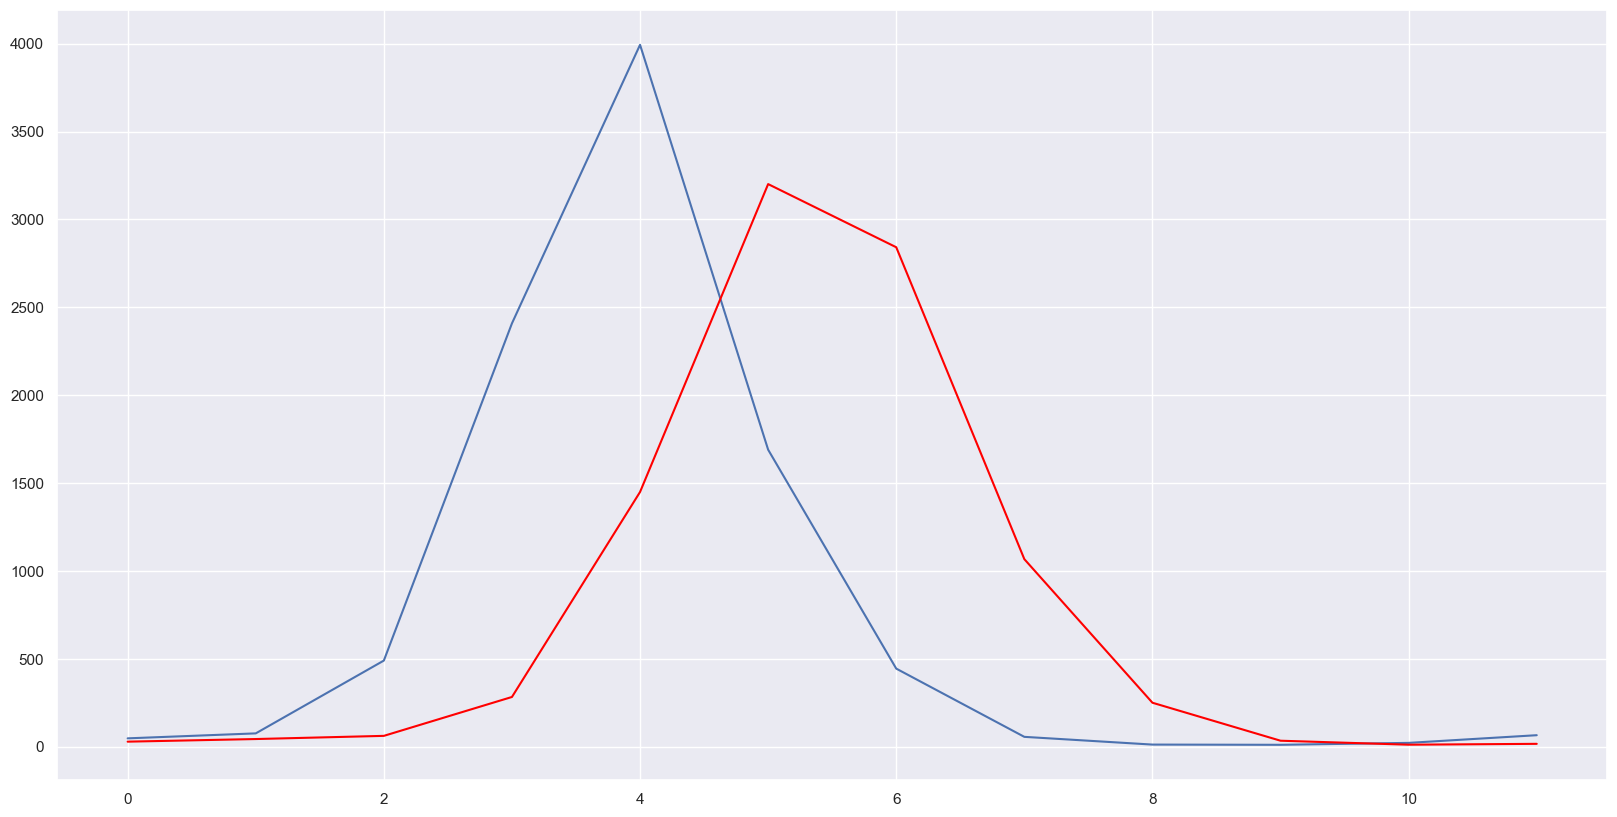

In [ ]:
from numpy import mean
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = df_flu['Total Cases']
window = 2
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window, length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print(f'predicted={yhat}, actual={obs}')

#evaluate
MSE = round(mean_squared_error(test, predictions),3)
RMSE = round(mean_squared_error(test, predictions, squared=False),3)
MAE = round(mean_absolute_error(test, predictions),3)

print(f'Test MSE: {MSE}')   # weights large errors more than smaller ones, good for penalizing big mistakes, loses unit because squared
print(f'Test RMSE: {RMSE}')  # more interpretable than MSE because avoids losing units. Also sensitive to outliers
print(f'Test MAE: {MAE}')   # doesn't penalize outliers as much

#can't use MAPE (mean absolute percentage error, because there are zero values in the dataset)


# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# zoom plot
plt.plot(test[0:12])
plt.plot(predictions[0:12], color='red')
plt.show()

In [ ]:
import sys
sys.path.append('../src/')

In [ ]:
from modules import evaluate_model

evaluate_model(test=test, predictions_test=predictions, train=None, predictions_train=None)

TypeError: 'module' object is not callable

In [ ]:
import numpy as np

## Train Test Split

In [ ]:
df_flu = pickle.load(open(r"..\data\flu_cases\df_flu_total.pkl", "rb" ))

In [ ]:
df_flu.head()

In [ ]:
type(df_flu['Total Cases'])

In [ ]:
# train / test split

X = df_flu['Total Cases']
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

print('train_length:', len(train), '\ntest_lenth:', len(test) )

# forecast horizon
h = len(test)
